In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
%matplotlib inline


In [2]:
#Load data
path = '/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/' #local path
os.listdir(path) #list files
plays_df = pd.read_csv(path + 'plays.csv') #load plays df
players_df = pd.read_csv(path + 'players.csv') #load players df
games_df = pd.read_csv(path + 'games.csv') #load games df

plays_df.columns #print columns


Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [3]:
#Data Cleaning --- How are we all handling NA values???
def remove_item(l, poss):
    ''' This function removes an item from list '''
    l.remove(poss)
    return l[0]

def pos_num(pos, side):
    ''' This function returns the number of players in a certain position for a given play'''
    pos_list = []
    if side == 'O': #if offense 
        for x in plays_df.personnelO: #loop through players
            try:
                if pos in x: # if position in x
                    pos_list.append(int(x[x.find(pos) - 2])) #get # of players for a position
                else:
                    pos_list.append(0) # return 0
            except:
                pos_list.append(0) # return 0
    else: #else defense 
        for x in plays_df.personnelD: #loop through players
            try:
                if pos in x: # if position in x
                    pos_list.append(int(x[x.find(pos) - 2]))  #get # of players for a position
                else:
                    pos_list.append(0) # return 0
            except:
                pos_list.append(0) # return 0

    return pos_list
        
### What do we think of looking for the position players per # of players in box?? 
plays_df['rb'] = pos_num('RB', side = 'O')
plays_df['te'] = pos_num('TE', side = 'O')
plays_df['wr'] = pos_num('WR', side = 'O')
plays_df['ol'] = pos_num('OL', side = 'O')
plays_df['dl'] = pos_num('DL', side = 'D')
plays_df['db'] = pos_num('DB', side = 'D')
plays_df['lb'] = pos_num('LB', side = 'D')
#Get rid of na for yardline #
plays_df['yardlineNumber'].replace(np.nan, 50) #replace nan values
plays_df['fieldSide'] = ['-' if row.possessionTeam == row.yardlineSide else '+' for index,row in plays_df.iterrows()] #50 treated as +
plays_df['yardlineNumber'] = [-1*row.yardlineNumber if row.fieldSide == '-' else row.yardlineNumber for index,row in plays_df.iterrows()] #50 treated as +

# How do we deal with NA?
#plays_df = plays_df.dropna(axis = 1)
#plays_df = plays_df.dropna(axis = 0)
# Leave it or replace with avg value 

#merge with gameDF
combo = plays_df.merge(games_df, on='gameId') #merge with game df
combo = combo.drop(columns = ['playId', 'playDescription', 'yardlineSide',
                                    'gameClock', 'penaltyJerseyNumbers'])
combo = combo.drop(columns = ['gameDate', 'gameTimeEastern', 'gameId']) #drop certain columns we dont want to look at
combo['defending_team'] = [remove_item([row.homeTeamAbbr, row.visitorTeamAbbr], row.possessionTeam)
                           for index,row in combo.iterrows()] #create a column for defensive team
combo.columns, combo.shape

(Index(['quarter', 'down', 'yardsToGo', 'possessionTeam', 'playType',
        'yardlineNumber', 'offenseFormation', 'personnelO', 'defendersInTheBox',
        'numberOfPassRushers', 'personnelD', 'typeDropback',
        'preSnapVisitorScore', 'preSnapHomeScore', 'absoluteYardlineNumber',
        'penaltyCodes', 'passResult', 'offensePlayResult', 'playResult', 'epa',
        'isDefensivePI', 'rb', 'te', 'wr', 'ol', 'dl', 'db', 'lb', 'fieldSide',
        'homeTeamAbbr', 'visitorTeamAbbr', 'week', 'defending_team'],
       dtype='object'), (19239, 33))

# Distribution of Defenders in the box (whole season)

/Users/dimitriospsaltos/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


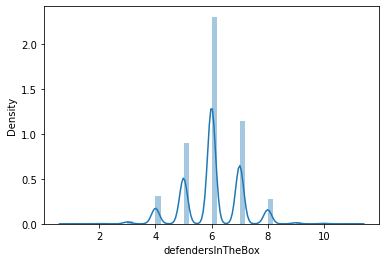

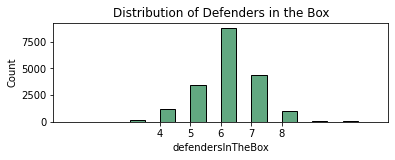

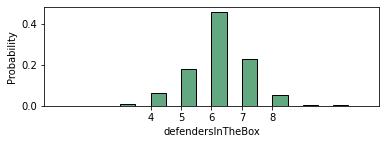

In [4]:
#All defenders in box Histogram
#print(combo.columns)
sns.distplot(combo.defendersInTheBox) #make density plot 
plt.show()


#plt.figure(1)
#plt.figure(figsize=(10, 5))
plt.subplot(212)
sns.histplot(combo.defendersInTheBox, binwidth=0.5, color='seagreen') #make historgram
plt.xticks(ticks=[4, 5, 6, 7, 8])
plt.title('Distribution of Defenders in the Box')
plt.show()

#plt.figure(figsize=(10, 5))
#plt.hist(plays_df.defendersInTheBox)
plt.subplot(211)
sns.histplot(combo.defendersInTheBox, stat = 'probability', binwidth=0.5, color='seagreen') #make histogram of %
plt.xticks(ticks=[4, 5, 6, 7, 8])
plt.show()

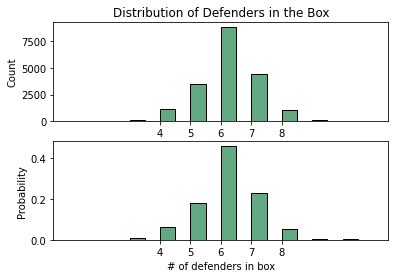

In [5]:
#refined distribution
plt.subplot(211)
sns.histplot(combo.defendersInTheBox, binwidth=0.5, color='seagreen') #make histogram
plt.xticks(ticks=[4, 5, 6, 7, 8]) #set ticks
plt.title('Distribution of Defenders in the Box') #make title


plt.subplot(212)
sns.histplot(combo.defendersInTheBox, stat = 'probability', binwidth=0.5, color='seagreen') #make histogram
plt.xticks(ticks=[4, 5, 6, 7, 8]) #set ticks
plt.xlabel('# of defenders in box') #make title

#savefig
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/distribution_def_inBox.png', facecolor='w')
plt.show()

In [6]:
#Distribution percentages
(combo['defendersInTheBox'].value_counts()/combo['defendersInTheBox'].count()) * 100

6.0     46.018668
7.0     22.949366
5.0     17.990301
4.0      6.101059
8.0      5.522240
3.0      0.693539
9.0      0.401523
10.0     0.161652
11.0     0.078219
2.0      0.073004
1.0      0.010429
Name: defendersInTheBox, dtype: float64

# Distribution of Defenders in Box
During the 2018 NFL Season, the most popular defensive formations included 6 defenders close to the line of scrimmage, providing pressure and blocking the run. This was folled by 7 and then 5 players in the box. About 99% (98.5) of the defensive formations from the 2018 NFL season used between 4 and 8 defenders in the box. The data follows a normal distribution.

In [4]:
# Remove # of defenders in the box if >8 or <4 
combo = combo[(combo.defendersInTheBox <= 8) & (combo.defendersInTheBox >= 4)] #boolean filter
print(combo.defendersInTheBox.describe())
print('median: {}'.format(combo.defendersInTheBox.median())) #return medians
combo.head()



count    18905.000000
mean         6.038561
std          0.940993
min          4.000000
25%          6.000000
50%          6.000000
75%          7.000000
max          8.000000
Name: defendersInTheBox, dtype: float64
median: 6.0


quarter  down  yardsToGo possessionTeam        playType  yardlineNumber  \
0        1     1         15            ATL  play_type_pass             -20   
1        1     1         10            ATL  play_type_pass              39   
2        1     2         10            ATL  play_type_pass              39   
3        1     3         10            ATL  play_type_pass              39   
4        1     3          1            ATL  play_type_pass               1   

  offenseFormation        personnelO  defendersInTheBox  numberOfPassRushers  \
0           I_FORM  2 RB, 1 TE, 2 WR                7.0                  4.0   
1       SINGLEBACK  1 RB, 1 TE, 3 WR                7.0                  4.0   
2          SHOTGUN  2 RB, 1 TE, 2 WR                6.0                  4.0   
3          SHOTGUN  1 RB, 1 TE, 3 WR                6.0                  5.0   
4          SHOTGUN  2 RB, 3 TE, 0 WR                8.0                  6.0   

   ... wr ol  dl  db  lb fieldSide homeTeamAbbr  visitorTeamAbbr  week  \
0  ...  2  0   4   5   2         -          PHI              ATL     1   
1  ...  3  0   4   5   2         +          PHI              ATL     1   
2  ...  2  0   4   5   2         +          PHI              ATL     1   
3  ...  3  0   4   6   1         +          PHI              ATL     1   
4  ...  0  0   6   2   3         +          PHI              ATL     1   

   defending_team  
0             PHI  
1             PHI  
2             PHI  
3             PHI  
4             PHI  

[5 rows x 33 columns]

# Heatmap of median values vs defenders in box
Saw the most defenders in box when few yards to go, which makes sense when you think about how teams will be rushing with short yardage. The # of defenders in box rises with # of pass rushers, as expected. Highest EPA with most defenders in box. 1 player in the box seemed to be more common in earlier weeks

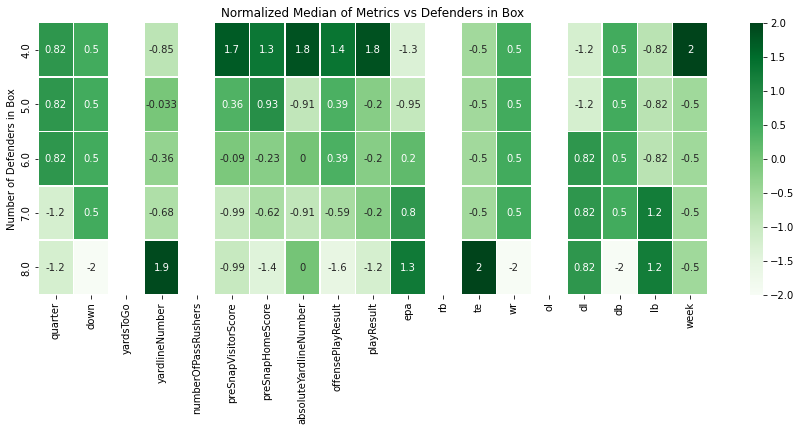

In [8]:
##Heatmap of median metric values vs defenders in box (pandas.groupby.median excludes NA)
plt.figure(figsize=(15,5))
sub_combo = combo.drop(columns=['playType', 'offenseFormation','personnelO','personnelD',
                                'typeDropback', 'fieldSide', 'isDefensivePI']) #drop columns you dont want 

#make heatmap and normalize values
sns.heatmap(sub_combo.groupby('defendersInTheBox').median().transform(lambda x: (x - np.nanmean(x)) / np.nanstd(x)), annot=True, linewidths=0.5, cmap='Greens')
plt.title('Normalized Median of Metrics vs Defenders in Box') #set title 
plt.ylabel('Number of Defenders in Box') #set y label
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/heatmap_defInBox.png') #save fig
#you are getting na because the normalization divides by 0 --- all values are the same

# Correlation Matrix

Chose to use kendall Tau method because it is better for discrete data (like defenders in the box)

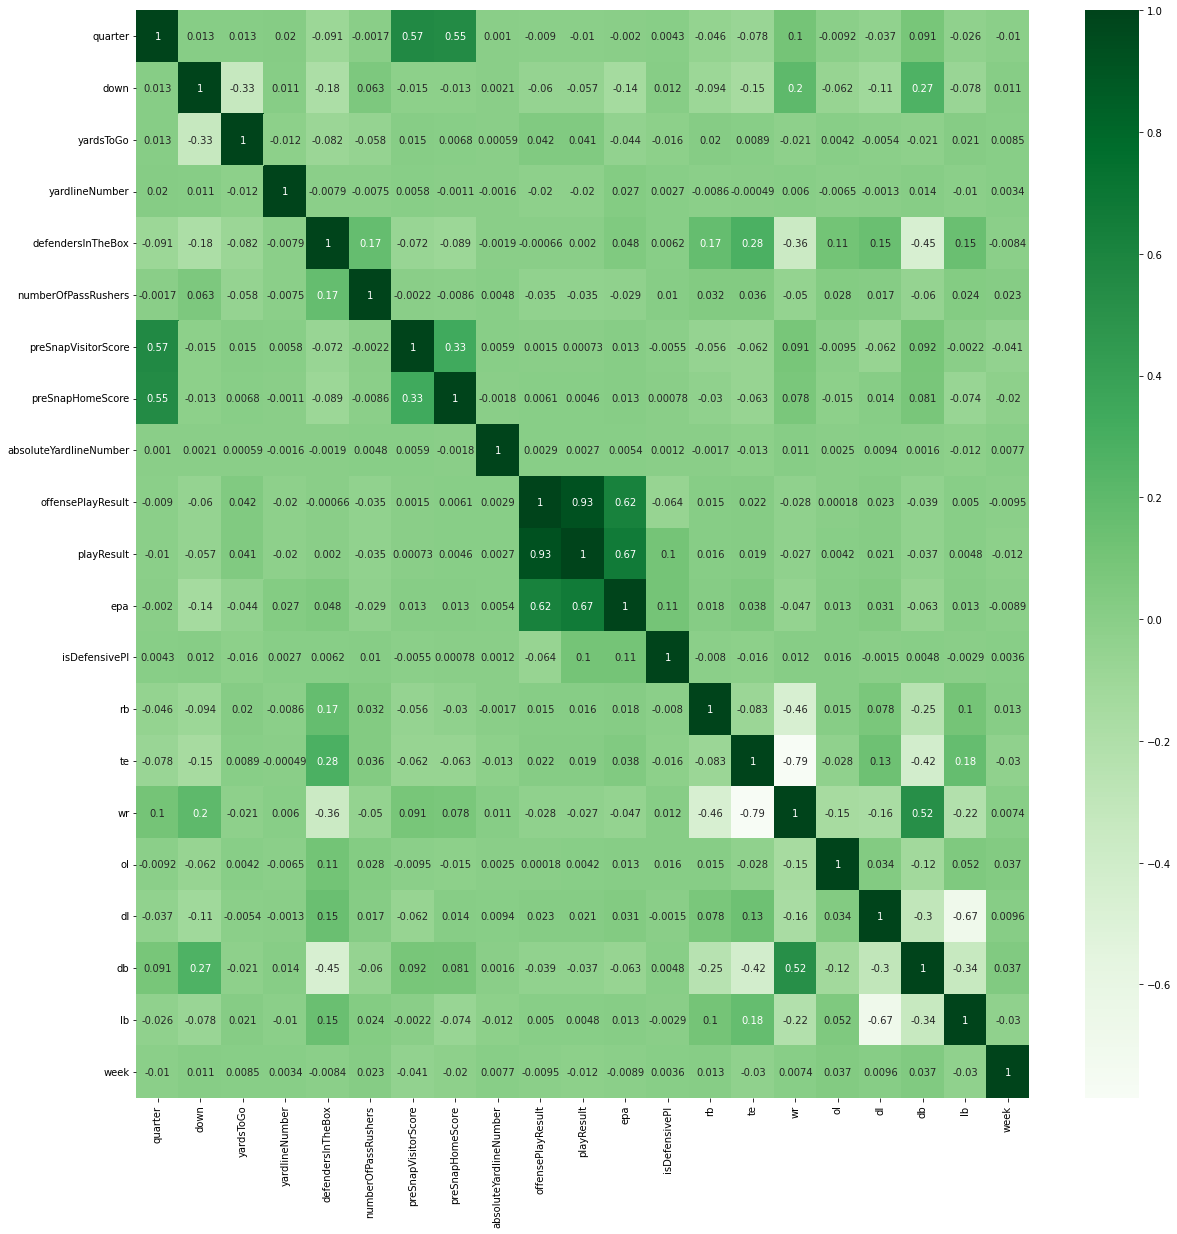

In [9]:
#create corr mat
corrmat = combo.corr(method = 'kendall') # corr() automatically removes NAs

#describe correlation matrix
plt.figure(figsize=(20,20))
corrmat.defendersInTheBox.describe() #describe corr mat
sns.heatmap(corrmat, annot=True, cmap='Greens') #plot heatmap
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/CorrPlot_NFL_2018.png') #savefig

# Correlation of defenders in box vs metrics
We notice that the number of players in the box decreases with the down, and distance to go. The number of defenders in box increases with the number of pass rushers (as expected). We saw a slight increase in epa vs # of defenders in box. No changes otherwise.

                        defendersInTheBox
db                              -0.451021
wr                              -0.360342
down                            -0.180929
quarter                         -0.090631
preSnapHomeScore                -0.088713
yardsToGo                       -0.082399
preSnapVisitorScore             -0.071821
week                            -0.008426
yardlineNumber                  -0.007896
absoluteYardlineNumber          -0.001949
offensePlayResult               -0.000657
playResult                       0.002013
isDefensivePI                    0.006206
epa                              0.048206
ol                               0.109407
lb                               0.153426
dl                               0.154911
rb                               0.171756
numberOfPassRushers              0.172378
te                               0.282233
defendersInTheBox                1.000000


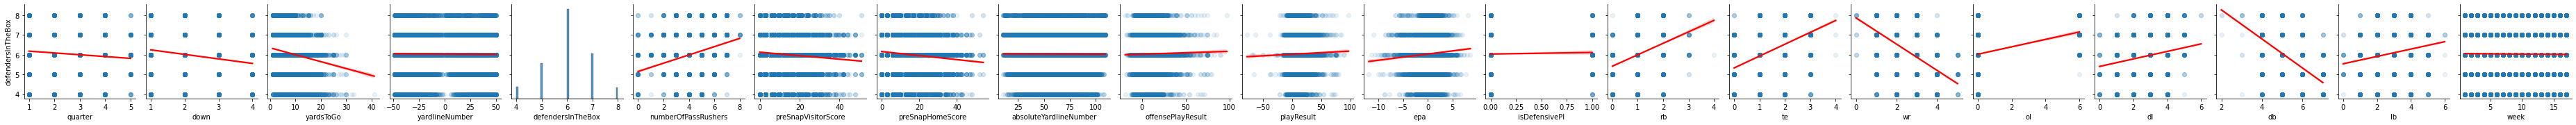

In [10]:

print(pd.DataFrame(corrmat.loc['defendersInTheBox'].sort_values())) # print corr mat of DIB
plot_cols =[n for n in list(combo.columns) if n not in ['defendersInTheBox', #filter list for comparisons we dont want
                                                                'penaltyCodes', 'penaltyJerseyNumbers',
                                                               'yardlineSide','possessionTeam',
                                                                'gameClock', 'playDescription']] 

#create pairplot
sns.pairplot(combo, y_vars='defendersInTheBox', palette='BuGn_r', kind="reg", plot_kws={'line_kws':{'color':'red'},
                                                                         'scatter_kws': {'alpha': 0.1}})



# Scatter plots w/ regression line

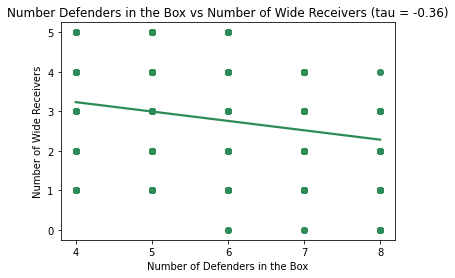

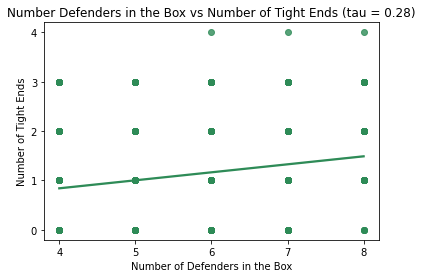

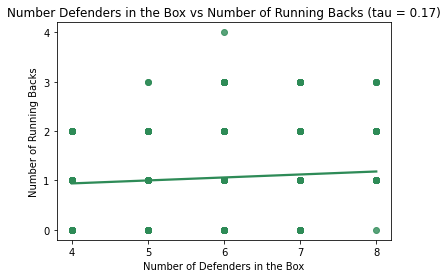

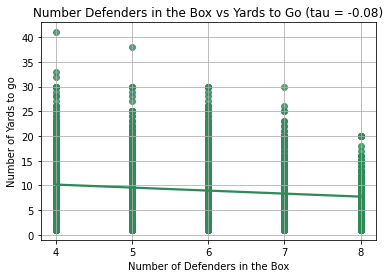

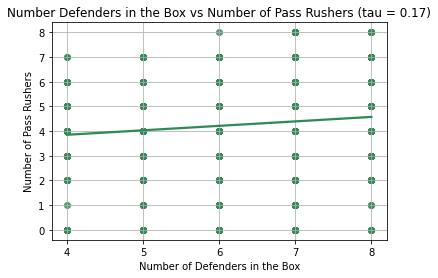

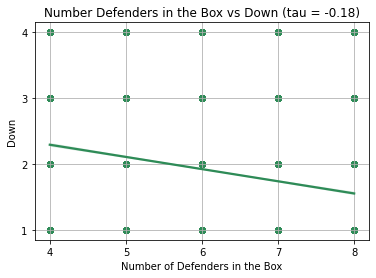

In [7]:
# plt.figure(1)
# sns.regplot(data =combo, x='defendersInTheBox', y='db', color="seagreen")
# plt.title('Number Defenders in the Box vs Number of Defensive Backs')
# plt.xlabel('Number of Defenders in the Box')
# plt.ylabel('Number of Defensive Backs')
# plt.xticks([4, 5, 6, 7, 8])
# plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_dB.png')

plt.figure(1)
#plt.subplots(311)
#fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,20))
sns.regplot(data =combo, x='defendersInTheBox', y='wr', color="seagreen", #ax=ax1,
            scatter_kws={'alpha':0.8})
plt.title('Number Defenders in the Box vs Number of Wide Receivers (tau = -0.36)')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Number of Wide Receivers')
plt.xticks([4, 5, 6, 7, 8])
#plt.patch.set_edgecolor('black')  
# fig.tight_layout(pad=3.0)
#ax1.grid()
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_wr.png')

plt.figure(2)
sns.regplot(data =combo, x='defendersInTheBox', y='te', color="seagreen",# ax=ax2,
            scatter_kws={'alpha':0.8})
plt.title('Number Defenders in the Box vs Number of Tight Ends (tau = 0.28)')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Number of Tight Ends')
plt.xticks([4, 5, 6, 7, 8])
plt.yticks([0, 1, 2, 3, 4])
#plt.grid()
#ax2.patch.set_edgecolor('black')  
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_te.png')

plt.figure(3)
#plt.subplots(313)
sns.regplot(data =combo, x='defendersInTheBox', y='rb', color="seagreen",# ax=ax3,
            scatter_kws={'alpha':0.8})
# fig.tight_layout(pad=3.0)
plt.title('Number Defenders in the Box vs Number of Running Backs (tau = 0.17)')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Number of Running Backs')
plt.xticks([4, 5, 6, 7, 8])
plt.yticks([0, 1, 2, 3, 4])
#plt.grid()
#ax3.patch.set_edgecolor('black')  
#plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_rb.png')
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_rb.png')


plt.figure(4)
sns.regplot(data =combo, x='defendersInTheBox', y='yardsToGo', color="seagreen", scatter_kws={'alpha':0.8})
plt.title('Number Defenders in the Box vs Yards to Go (tau = -0.08)')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Number of Yards to go')
plt.xticks([4, 5, 6, 7, 8])
plt.grid()
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_yardsToGo.png')

plt.figure(6)
sns.regplot(data =combo, x='defendersInTheBox', y='numberOfPassRushers', color="seagreen", scatter_kws={'alpha':0.8})
plt.title('Number Defenders in the Box vs Number of Pass Rushers (tau = 0.17)')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Number of Pass Rushers')
plt.xticks([4, 5, 6, 7, 8])
plt.grid()
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_numberOfPassRushers.png')

plt.figure(5)
sns.regplot(data =combo, x='defendersInTheBox', y='down', color="seagreen", scatter_kws={'alpha':0.8})
#fig.tight_layout(pad=3.0)
plt.title('Number Defenders in the Box vs Down (tau = -0.18)')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Down')
plt.xticks([4, 5, 6, 7, 8])
plt.yticks([1, 2, 3, 4])
plt.grid()
plt.savefig('/users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/DIB_cor_down.png')



In [12]:
#only use columns with some recognizable change
colnames = ['defendersInTheBox', 'quarter', 'down', 'yardsToGo', 'playType', 'passResult',# 'numberOfPassRushers',
            'rb', 'te', 'wr', 'ol', 'wr', 'ol', 'dl',
            'db', 'epa', 'playResult', 'PassResult', 'offenseFormation', 'numberOfPassRushers', 'typeDropback']
filtered_combo = combo.filter(colnames) #filter the dataset 
filtered_combo.columns

Index(['defendersInTheBox', 'quarter', 'down', 'yardsToGo', 'playType',
       'passResult', 'rb', 'te', 'wr', 'ol', 'wr', 'ol', 'dl', 'db', 'epa',
       'playResult', 'offenseFormation', 'numberOfPassRushers',
       'typeDropback'],
      dtype='object')

# Create bar graphs

quarter


<Figure size 432x288 with 0 Axes>

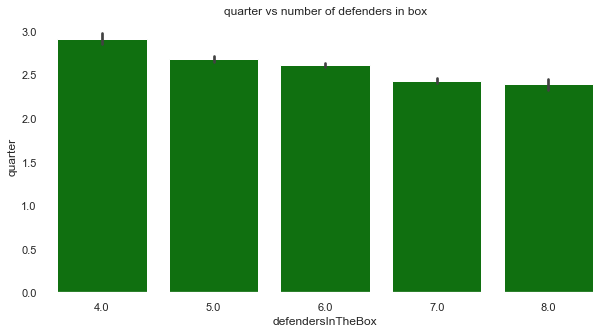

down


<Figure size 432x288 with 0 Axes>

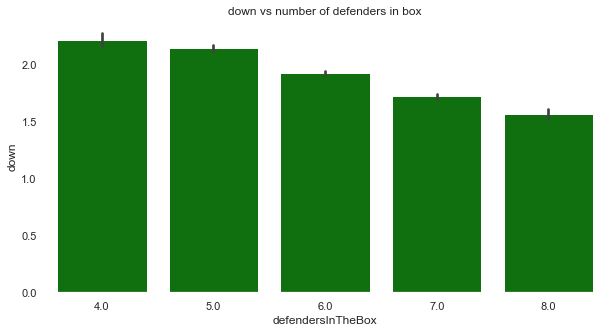

yardsToGo


<Figure size 432x288 with 0 Axes>

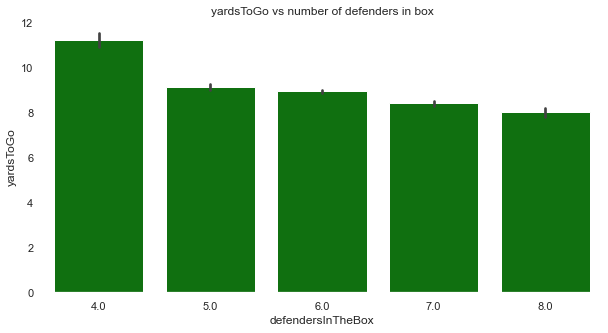

playType


<Figure size 432x288 with 0 Axes>

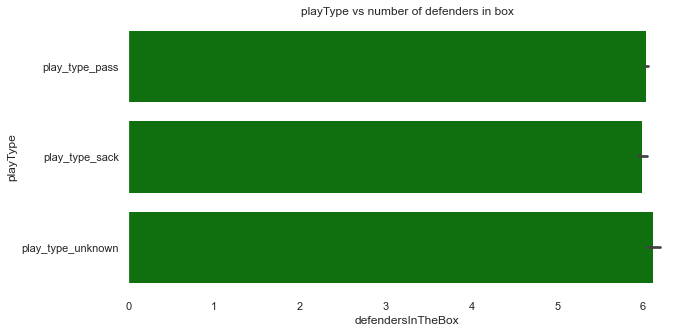

offenseFormation


<Figure size 432x288 with 0 Axes>

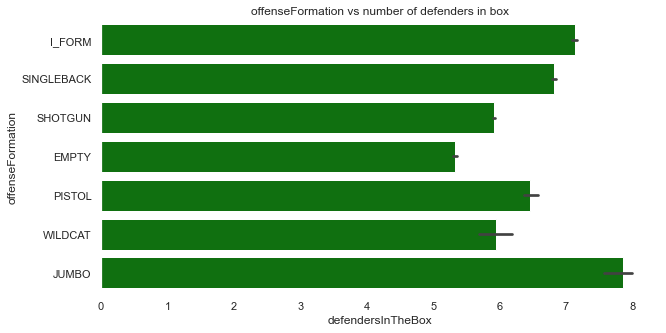

defendersInTheBox


<Figure size 432x288 with 0 Axes>

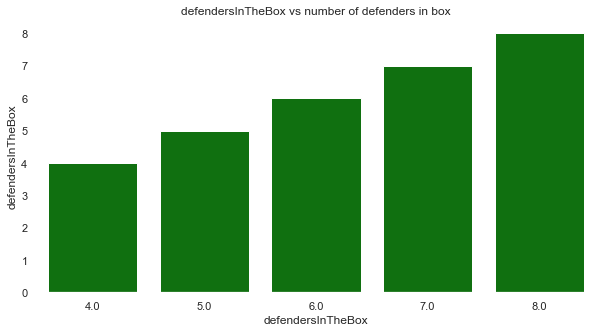

numberOfPassRushers


<Figure size 432x288 with 0 Axes>

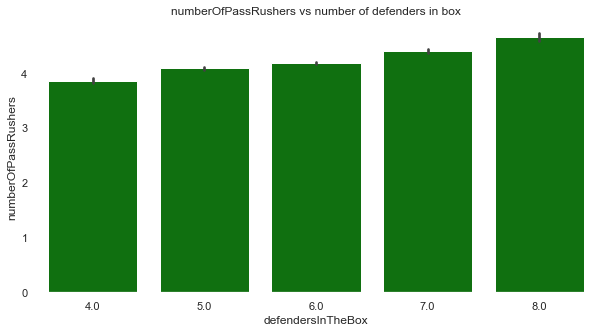

typeDropback


<Figure size 432x288 with 0 Axes>

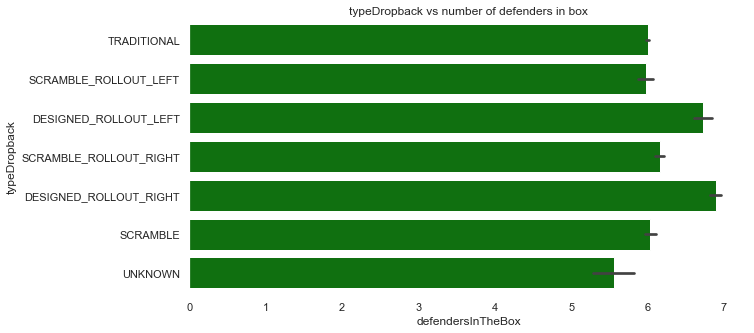

passResult


<Figure size 432x288 with 0 Axes>

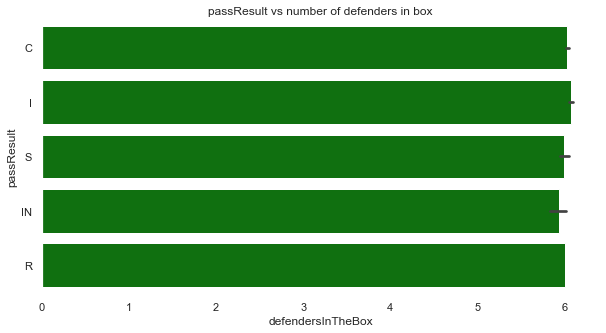

playResult


<Figure size 432x288 with 0 Axes>

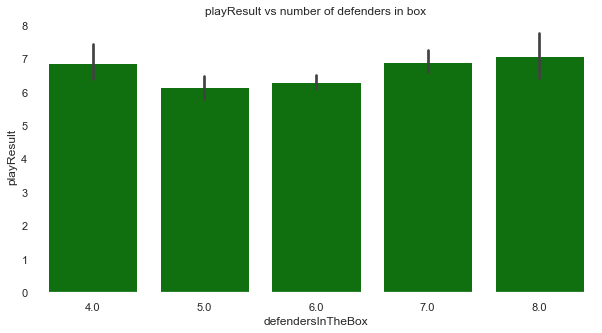

epa


<Figure size 432x288 with 0 Axes>

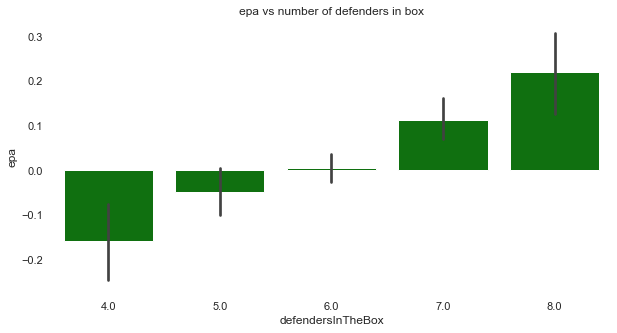

rb


<Figure size 432x288 with 0 Axes>

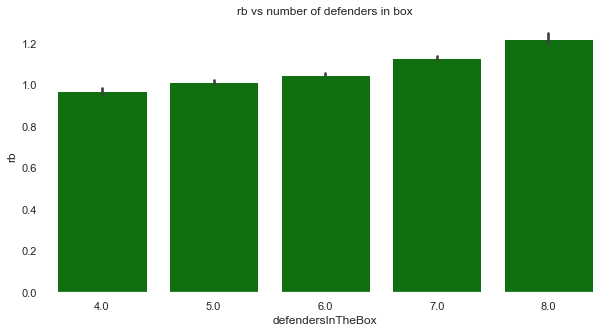

te


<Figure size 432x288 with 0 Axes>

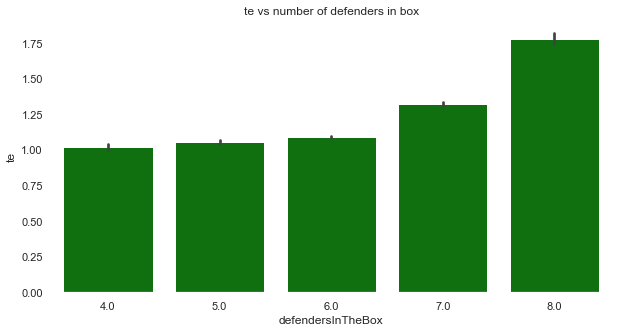

wr


<Figure size 432x288 with 0 Axes>

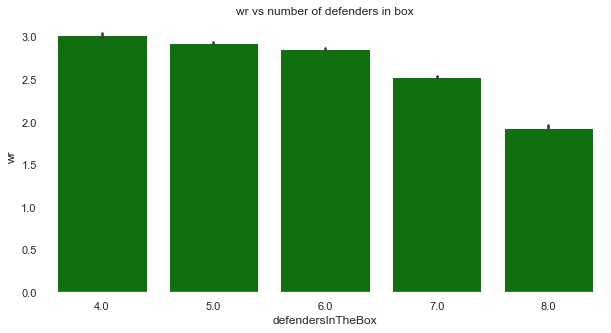

ol


<Figure size 432x288 with 0 Axes>

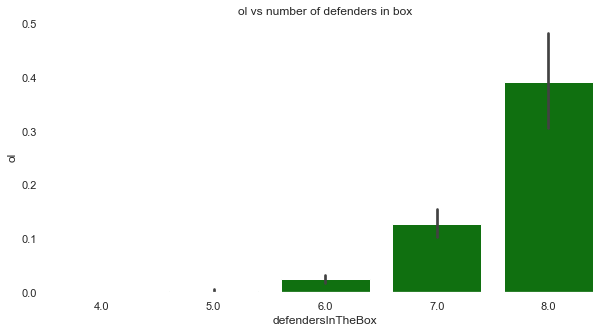

dl


<Figure size 432x288 with 0 Axes>

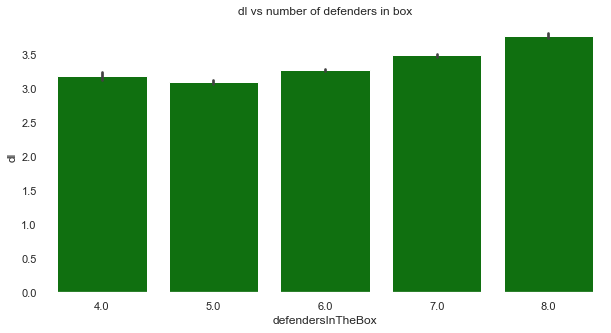

db


<Figure size 432x288 with 0 Axes>

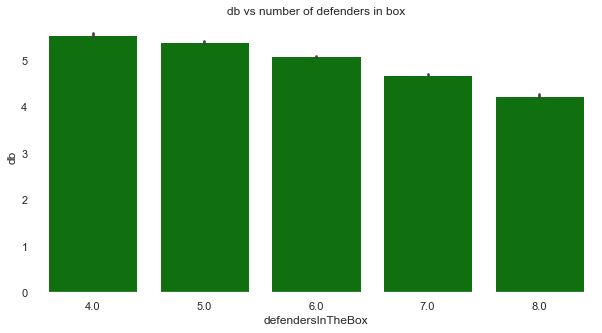

In [13]:
#Bar graphs 
counter = 1
for n in combo.columns: #loop through columns 
    if n in colnames: #check if columns are in desired columns
        
        print(n)
        plt.figure(counter)
        plt.figure(figsize=(10,5))
        sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}) # set face color
        sns.barplot(data = combo, x='defendersInTheBox', y=n, color='green')# plot bar graph
        plt.title('{} vs number of defenders in box'.format(n)) #title
        #save
        plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format(n))
        plt.show()
        plt.close()
        counter +=1
    else:
        continue

- median quarter decreases with defenders in box and down
- defenders in box increases inversly with distance to go 
- Run plays with more DIB and pass with less
- Type of pass play effects defenders in box formation
- EPA increases with defenders in box 
- increaes with TE and RB, decreases with increasing wide recievers 

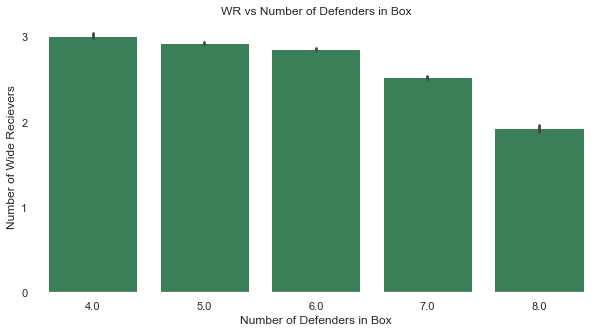

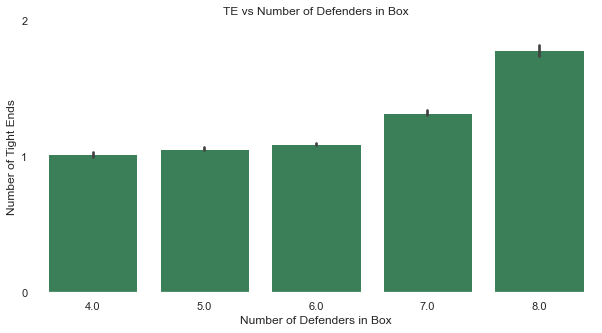

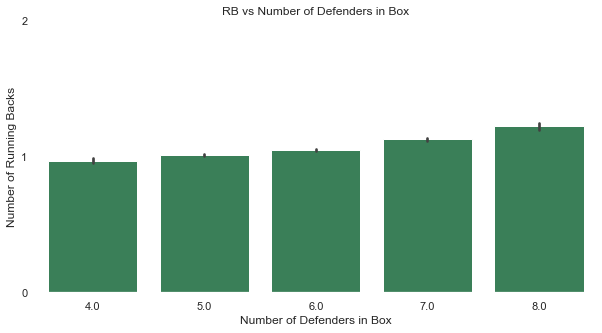

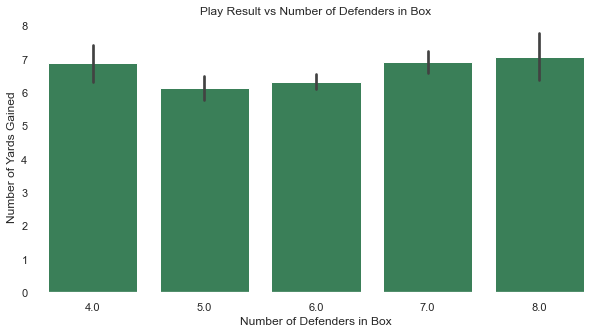

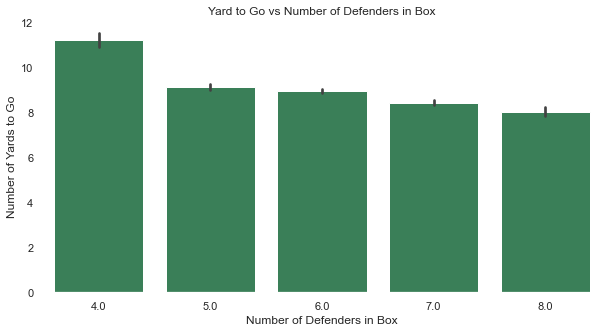

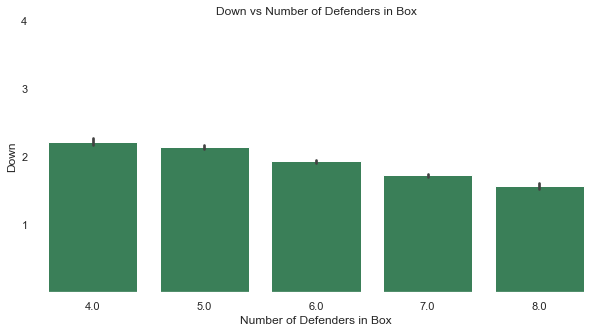

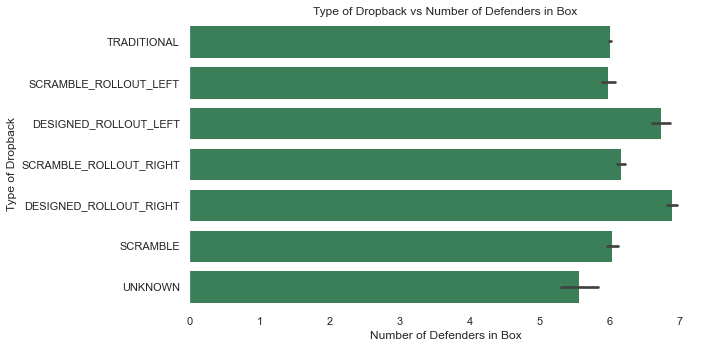

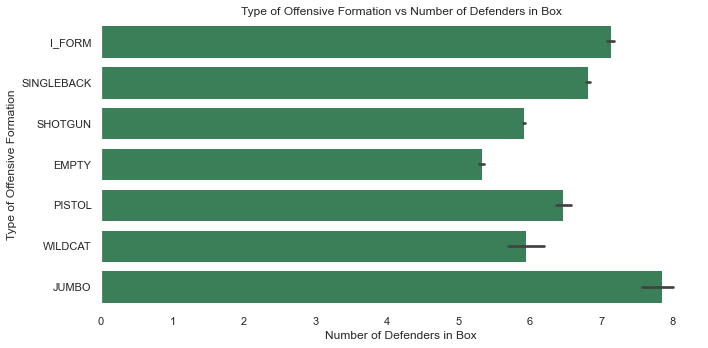

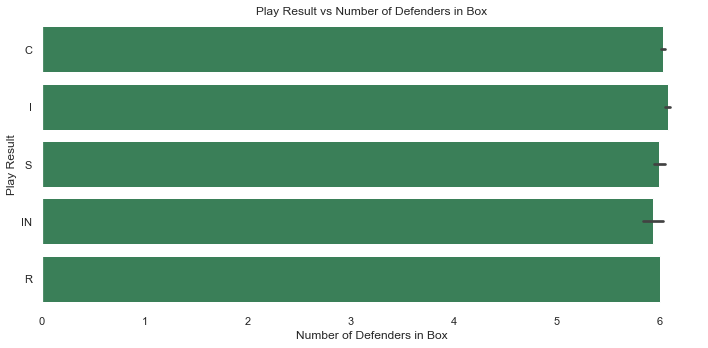

In [14]:
## create final plots 

#wr
plt.figure(1, figsize=(10,5))
#plt.subplots(311)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='wr', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('WR'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Number of Wide Recievers')
plt.yticks([0,1,2,3])
plt.grid(True)
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('wr'))

#TE
plt.figure(2, figsize=(10,5))
#plt.subplots(312)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='te', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('TE'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Number of Tight Ends')
plt.yticks([0,1,2,3,4])
plt.grid(True)
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('te'))

#RB
plt.figure(3, figsize=(10,5))
#plt.subplots(313)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='rb', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('RB'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Number of Running Backs')
plt.yticks([0,1,2,3])
plt.grid(True)
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('rb'))

#Play result
plt.figure(4, figsize=(10,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='playResult', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('Play Result'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Number of Yards Gained')
plt.grid(True)
#plt.yticks(['0', '1', '2'])
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('playResult'))

#Yards to go
plt.figure(5, figsize=(10,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='yardsToGo', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('Yards to Go'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Number of Yards to Go')
plt.grid(True)
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('yardsGo'))

#Down
plt.figure(6, figsize=(10,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='down', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('Down'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Down')
plt.yticks([1, 2, 3, 4])
plt.grid(True)
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('rb'))

#typeDropback
plt.figure(7, figsize=(10,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='typeDropback', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('Type of Dropback'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Type of Dropback')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('dropback'))

#offenseFormation
plt.figure(8, figsize=(10,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='offenseFormation', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('Type of Offensive Formation'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Type of Offensive Formation')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('offForm'))

#passResult
plt.figure(9, figsize=(10,5))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.barplot(data = combo, x='defendersInTheBox', y='passResult', color='seagreen')#, hue='defendersInTheBox')
plt.title('{} vs Number of Defenders in Box'.format('Play Result'))
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Play Result')
plt.grid(True)
plt.tight_layout()
plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/bar_plot_{}_vsDefInBox.png'.format('playResult'))


#print(combo.columns)

In [15]:
#combo.plot(x='defendersInTheBox', y=['rb', 'wr', 'te'])

Quarter: 7, 8 and 9 defenders in the box was most common in earlier quarters (median = 2)

## Designed Rollout Left --- Running play 

Down: 8 defenders in the box had the lowest median of 1.75 downs. followed by 7 defenders in the box, around 2 downs and 7 and 10, 2 downs.

YardsToGo: the number of defenders in the box seemed to increase with the # of yards to go.

PlayType: The median # of defenders in the box did not change, however, we saw that when a play type was a sack, the # of defenders in the box was betwen 5 and 7 (which is similar to the distribution). Passing plays saw a few fewer players in the box, but the core # of players in box was betewen 6 and 7, as well as play_type_unkown.

Offensive Formation: Jumbo saw the highest median defenders in the box, follwed by IFormation. The least # of defenders in the box was seen in shotgun and empty backfield, which are usually passing plays.

Number of pass rushers: This increased with the # of players in the box. As more pass rushers were on the line of scrimige, you would expect that there are more players in box.

typeDropback: The most players in box were used when the play type was Designed Rollout Left, followed by Designed Rollout Right. The least # of defenders in box, was unkown followed by scramble rollout left.

passResult: There was limited variability between the # of defenders in box. When the fewest # of defenders in the box (5-6) was most common for interseptions. ##Fewer defender in the box -- increased likelhood of intersept... may not be great to stack the box against passing teams 

OffensivePlayResult: The most # of yards was gained when 3 players were in the box. The fewest was when there was 10 players in box. 

EPA: lowest EPA was when there were only 2 players in box (to contain any long passes) and the highest EPA (3) was when 10 players were in box (field goal)

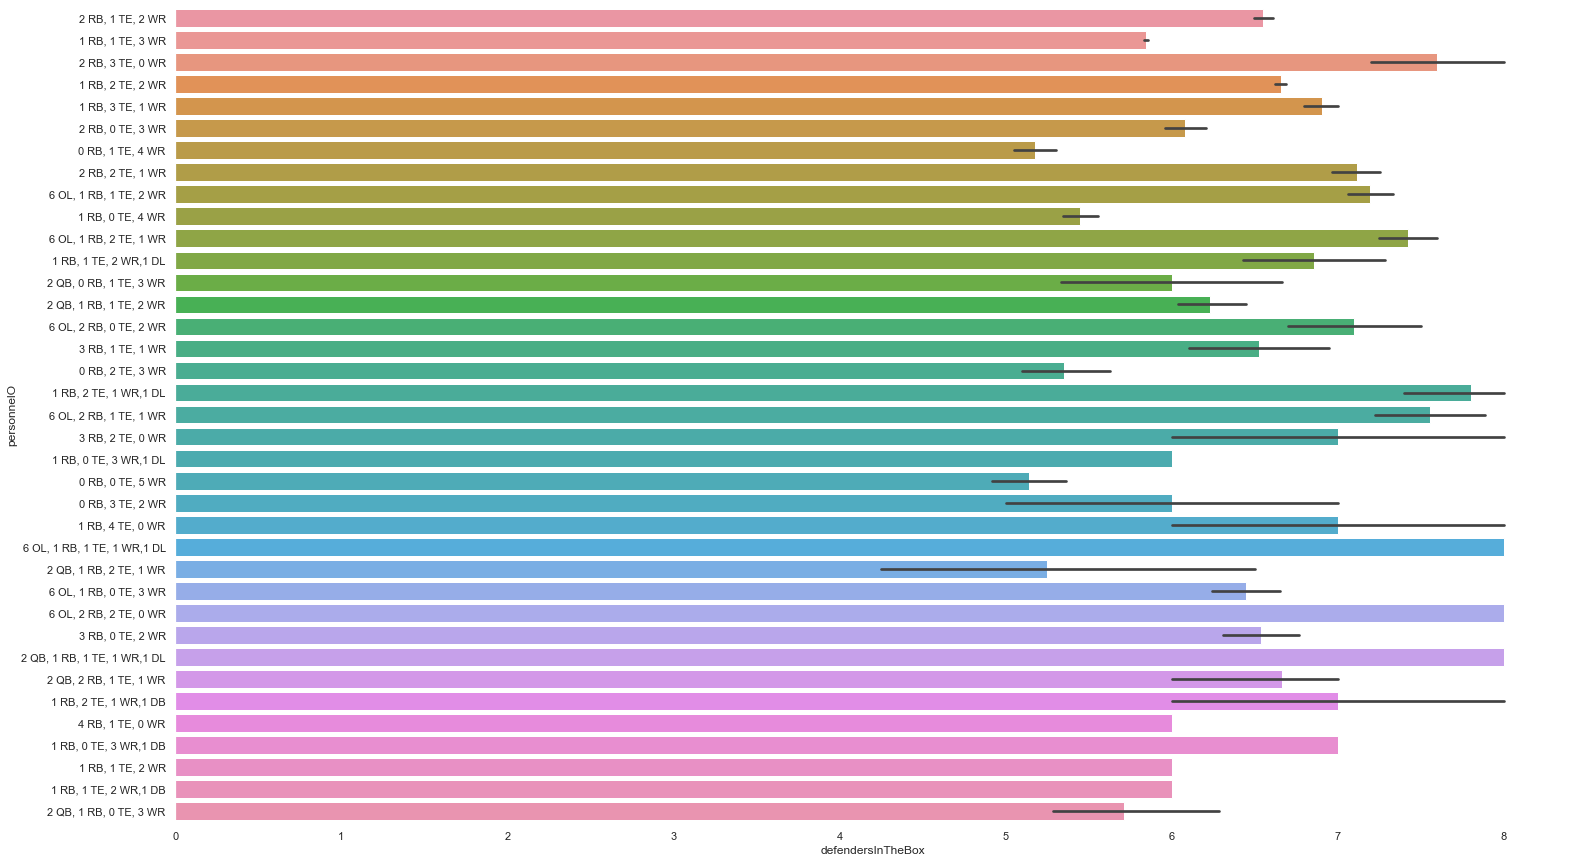

In [16]:
#look at defenders in the box by offensive personel
plt.figure(figsize=(25, 15))
sns.barplot(data = combo, x='defendersInTheBox', y='personnelO')#, hue='defendersInTheBox')
plt.show()

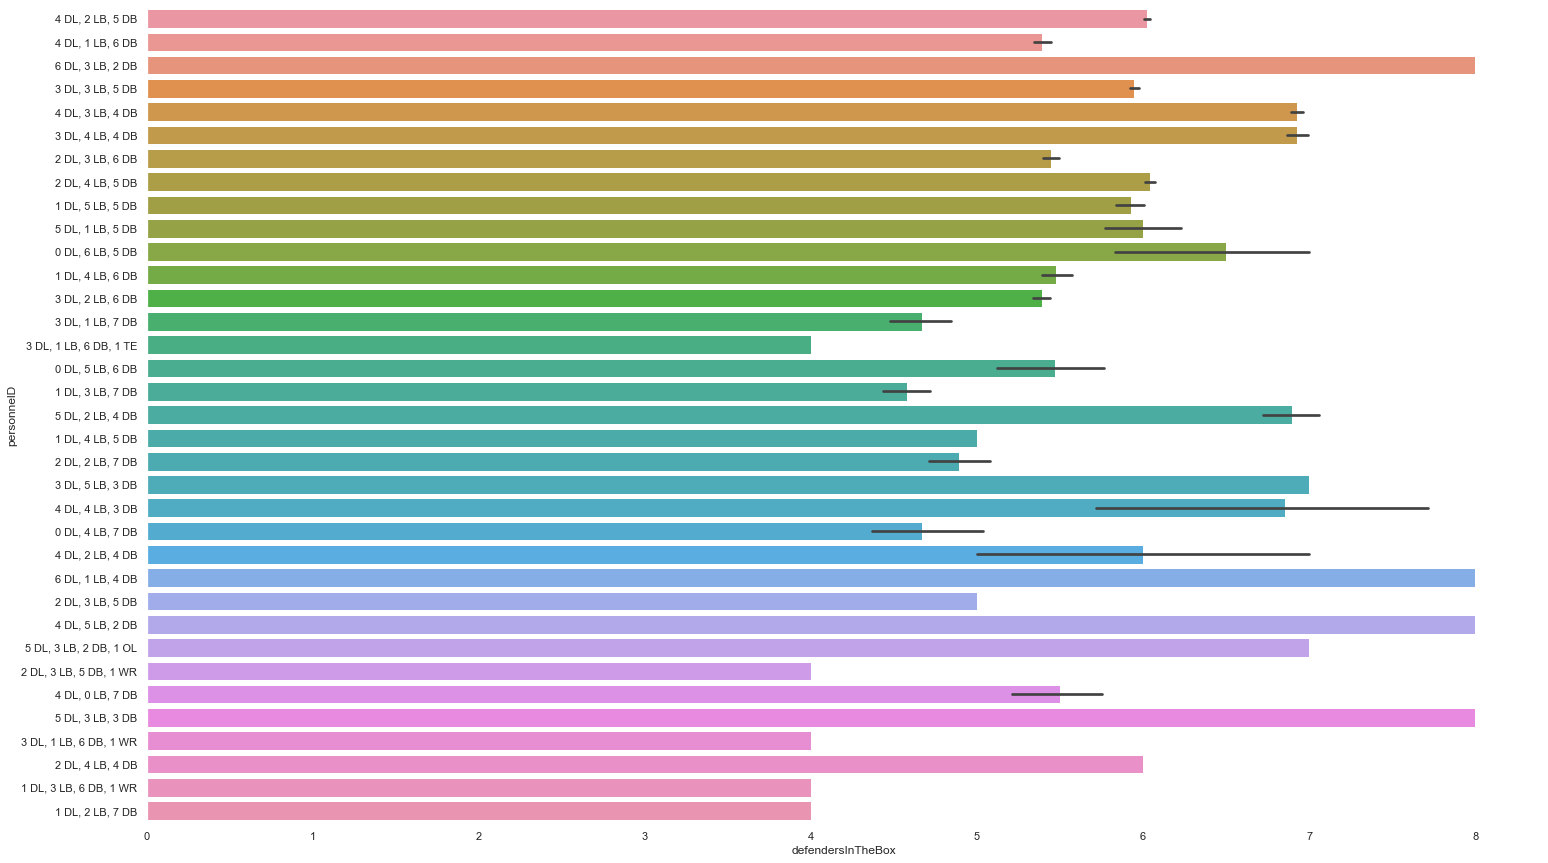

In [17]:
#look at defenders in the box by defensive personel
plt.figure(figsize=(25, 15))
sns.barplot(data = combo, x='defendersInTheBox', y='personnelD')#, hue='defendersInTheBox')
plt.show()

# Distribution or each metric vs defenders in the box groups


--------------------------------------------------
4.0
           quarter         down    yardsToGo  yardlineNumber  \
count  1170.000000  1170.000000  1170.000000     1170.000000   
mean      2.916239     2.217949    11.199145       -5.583761   
std       1.116710     0.907823     5.354067       32.965081   
min       1.000000     1.000000     1.000000      -49.000000   
25%       2.000000     1.000000     9.000000      -35.000000   
50%       3.000000     2.000000    10.000000      -19.500000   
75%       4.000000     3.000000    14.000000       29.000000   
max       5.000000     4.000000    41.000000       50.000000   

       defendersInTheBox  numberOfPassRushers  preSnapVisitorScore  \
count             1170.0          1145.000000          1145.000000   
mean                 4.0             3.859389            13.396507   
std                  0.0             0.708565            10.314969   
min                  4.0             0.000000             0.000000   
25%               

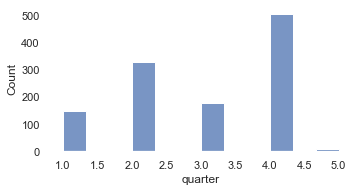

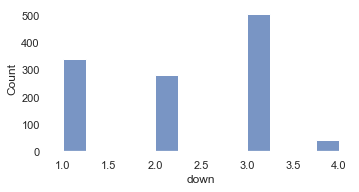

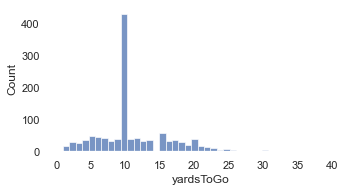

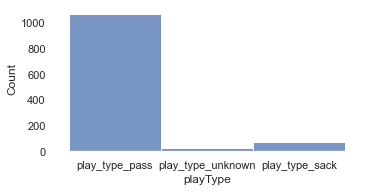

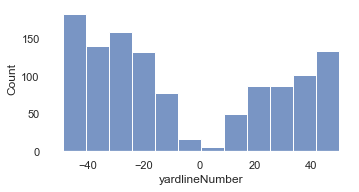

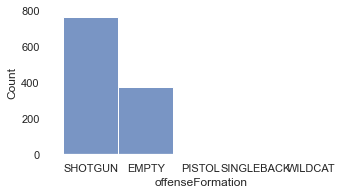

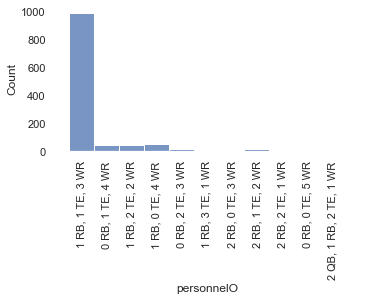

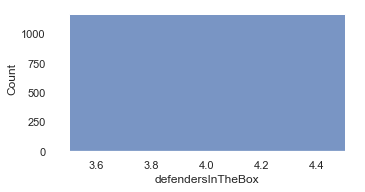

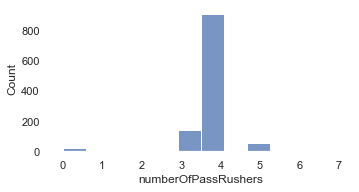

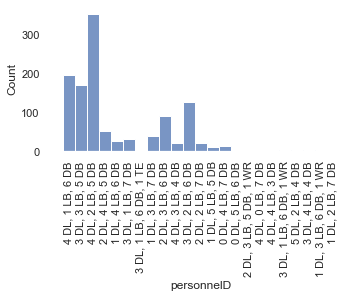

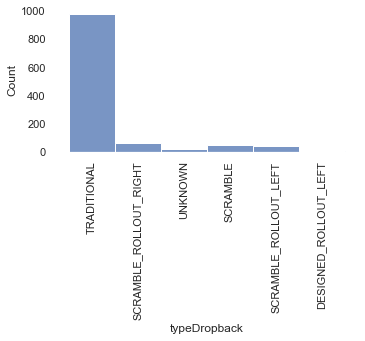

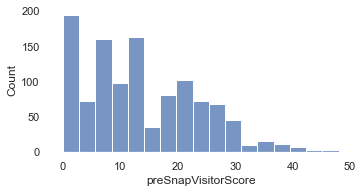

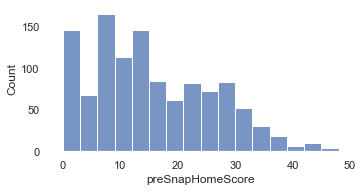

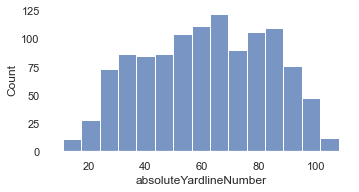

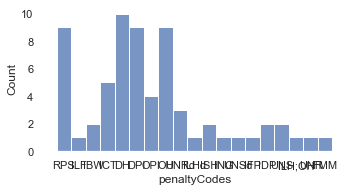

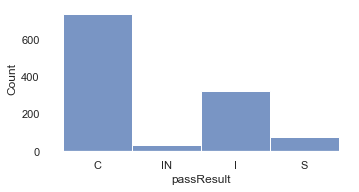

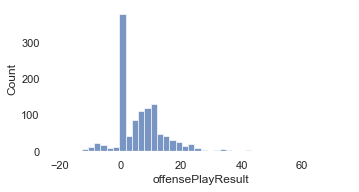

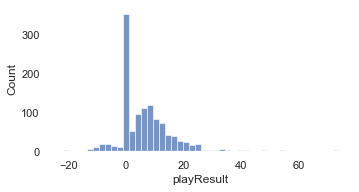

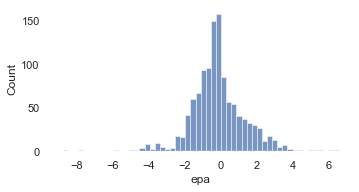

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


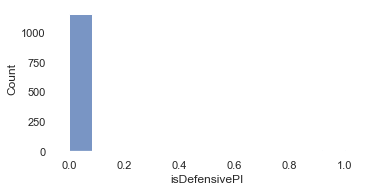

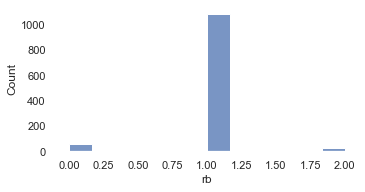

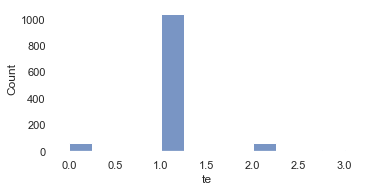

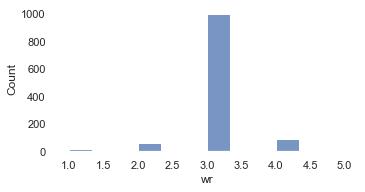

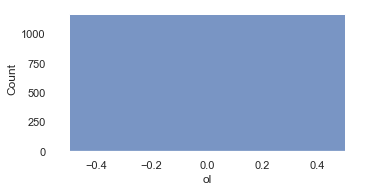

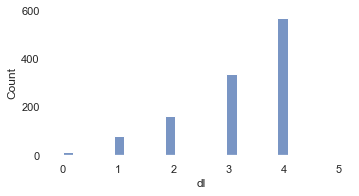

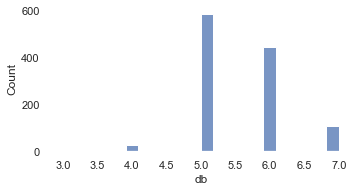

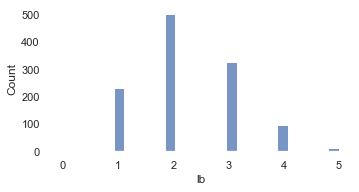

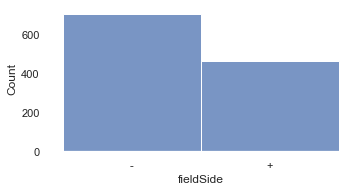

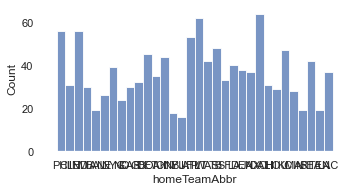

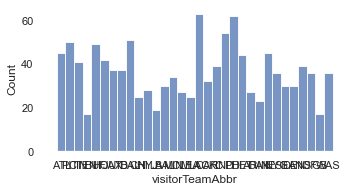

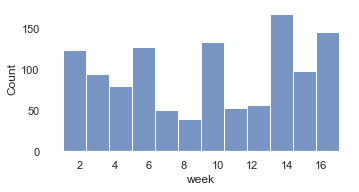

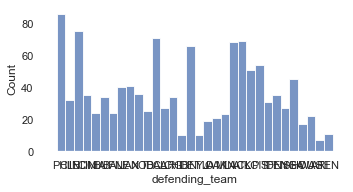

--------------------------------------------------
5.0
           quarter         down    yardsToGo  yardlineNumber  \
count  3450.000000  3450.000000  3450.000000     3450.000000   
mean      2.680580     2.141739     9.115652       -3.476522   
std       1.127942     0.861147     4.002132       32.578903   
min       1.000000     1.000000     1.000000      -49.000000   
25%       2.000000     1.000000     7.000000      -32.000000   
50%       3.000000     2.000000    10.000000      -17.000000   
75%       4.000000     3.000000    10.000000       29.000000   
max       5.000000     4.000000    38.000000       50.000000   

       defendersInTheBox  numberOfPassRushers  preSnapVisitorScore  \
count             3450.0          3344.000000          3342.000000   
mean                 5.0             4.081639            11.393776   
std                  0.0             0.733929             9.878426   
min                  5.0             0.000000             0.000000   
25%               

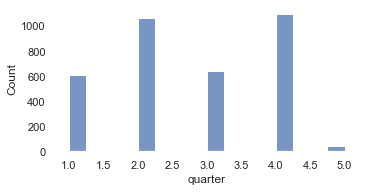

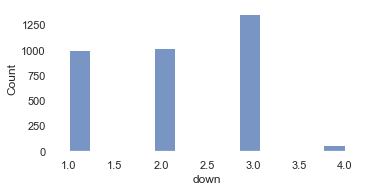

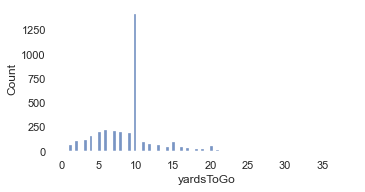

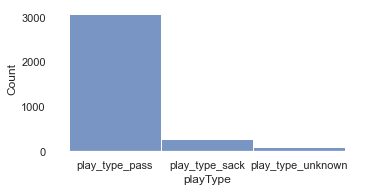

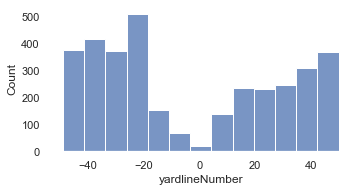

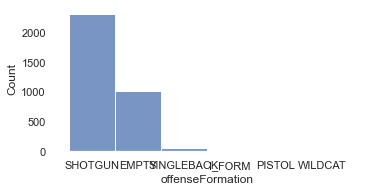

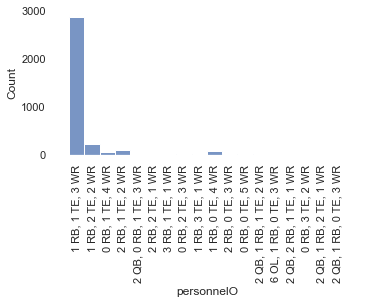

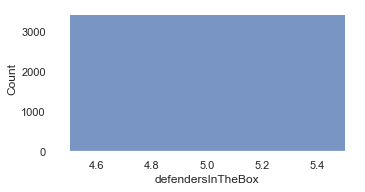

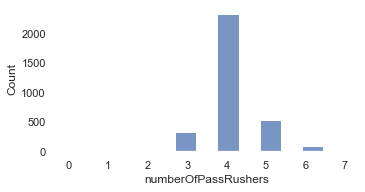

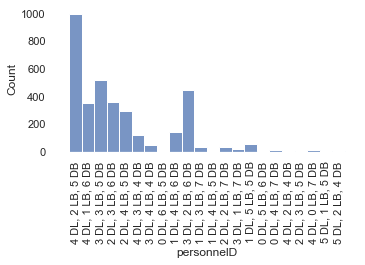

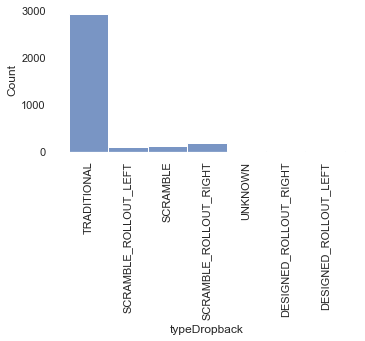

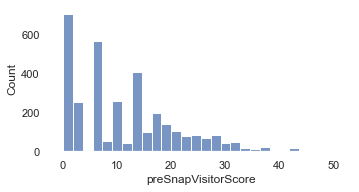

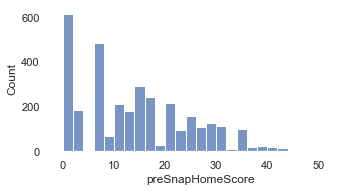

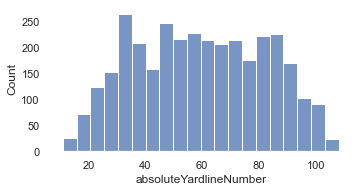

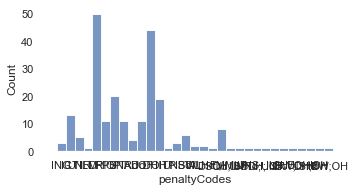

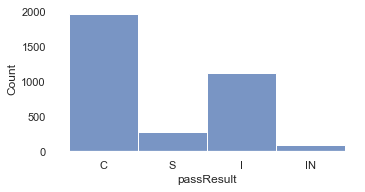

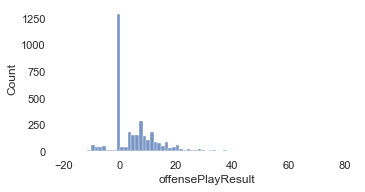

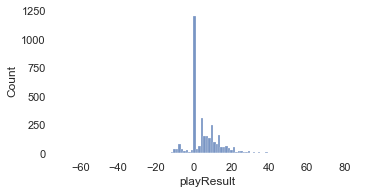

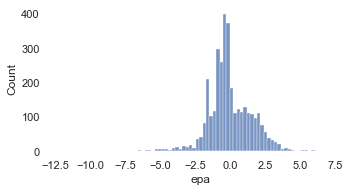

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


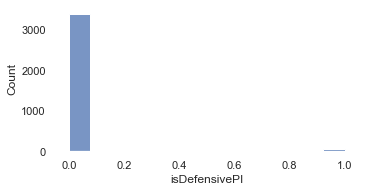

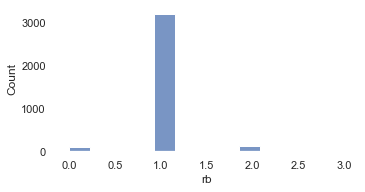

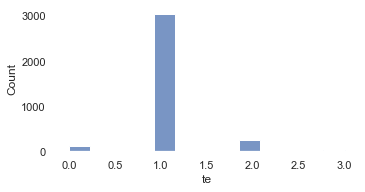

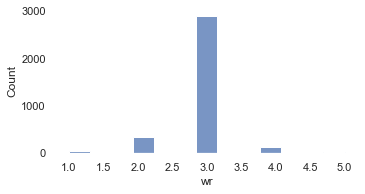

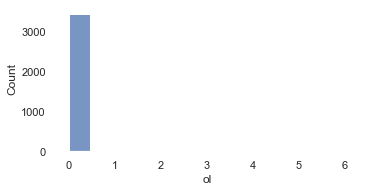

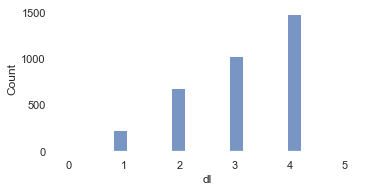

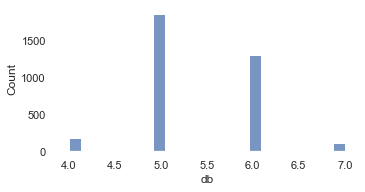

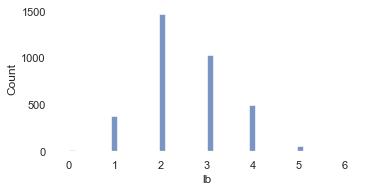

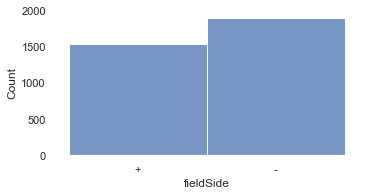

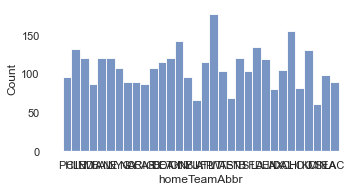

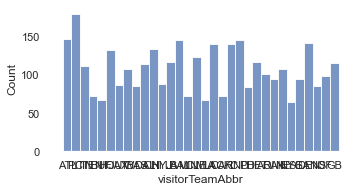

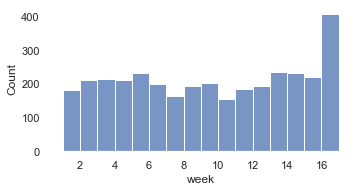

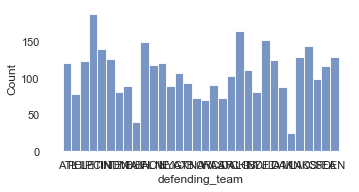

--------------------------------------------------
6.0
           quarter         down    yardsToGo  yardlineNumber  \
count  8825.000000  8825.000000  8825.000000     8825.000000   
mean      2.614504     1.927592     8.933824       -4.810765   
std       1.109106     0.830128     3.842805       32.146290   
min       1.000000     1.000000     1.000000      -49.000000   
25%       2.000000     1.000000     7.000000      -33.000000   
50%       3.000000     2.000000    10.000000      -18.000000   
75%       4.000000     3.000000    10.000000       27.000000   
max       5.000000     4.000000    30.000000       50.000000   

       defendersInTheBox  numberOfPassRushers  preSnapVisitorScore  \
count             8825.0          8558.000000          8555.000000   
mean                 6.0             4.177845            10.831911   
std                  0.0             0.812094             9.875554   
min                  6.0             0.000000             0.000000   
25%               

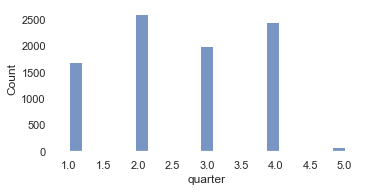

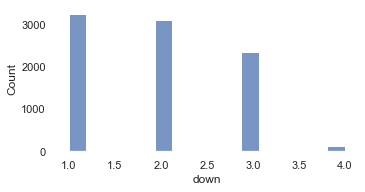

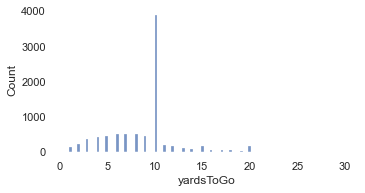

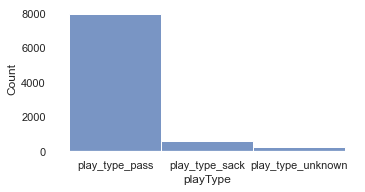

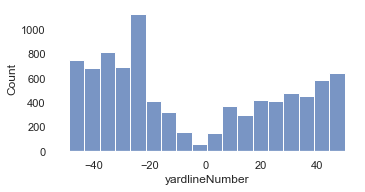

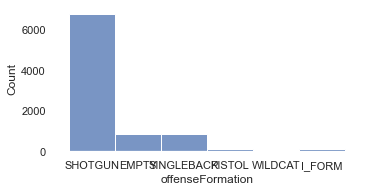

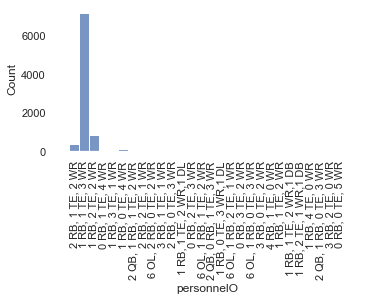

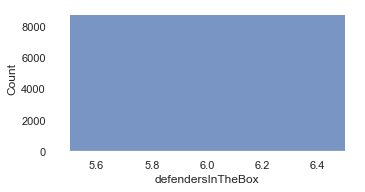

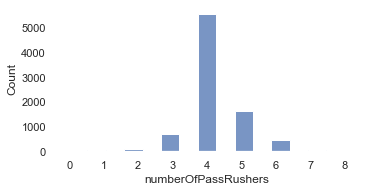

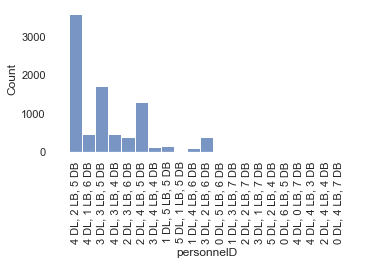

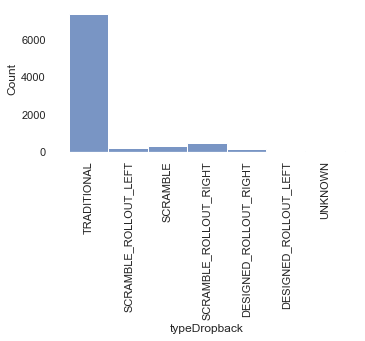

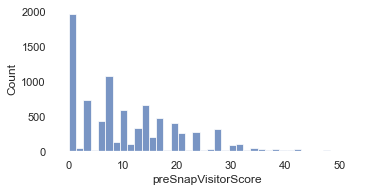

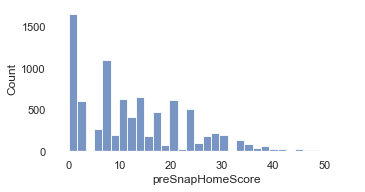

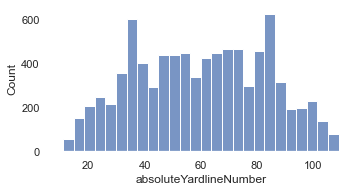

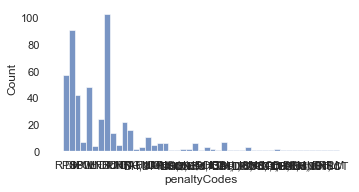

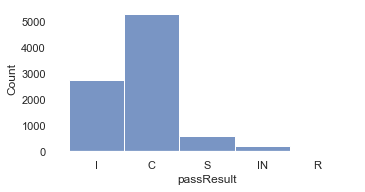

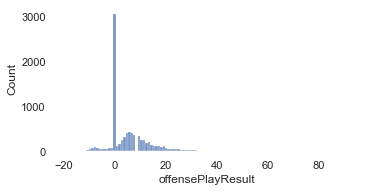

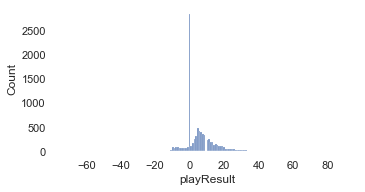

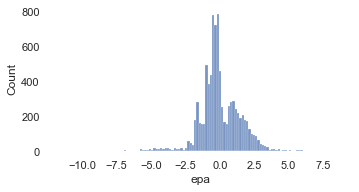

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


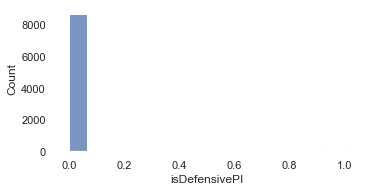

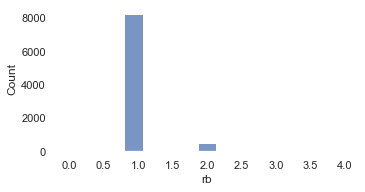

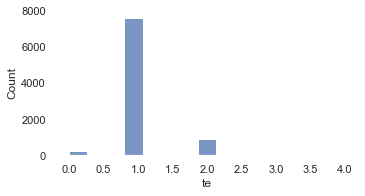

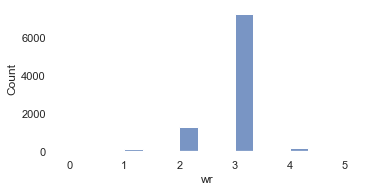

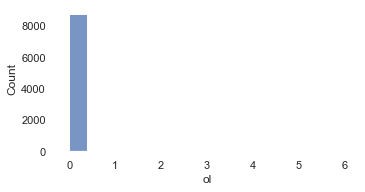

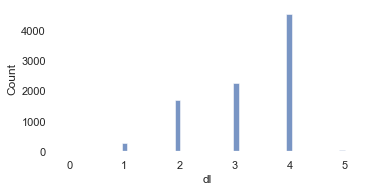

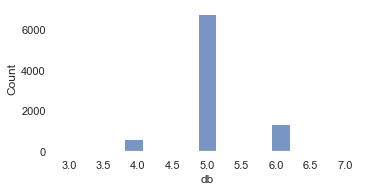

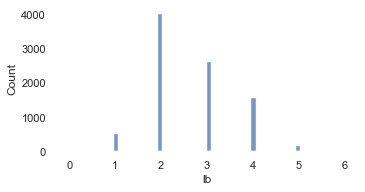

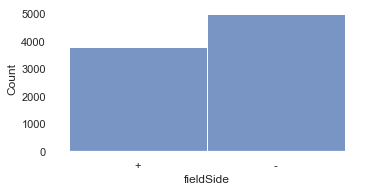

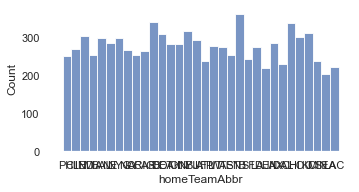

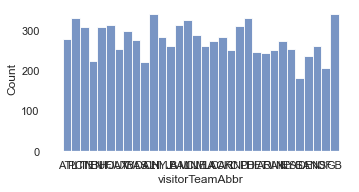

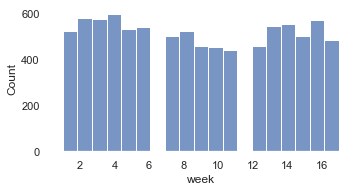

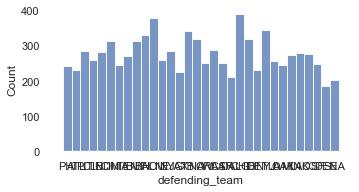

--------------------------------------------------
7.0
           quarter         down    yardsToGo  yardlineNumber  \
count  4401.000000  4401.000000  4401.000000     4401.000000   
mean      2.433083     1.719382     8.408316       -5.528289   
std       1.131024     0.790920     3.421365       31.509157   
min       1.000000     1.000000     1.000000      -49.000000   
25%       1.000000     1.000000     6.000000      -32.000000   
50%       2.000000     2.000000    10.000000      -19.000000   
75%       3.000000     2.000000    10.000000       25.000000   
max       5.000000     4.000000    30.000000       50.000000   

       defendersInTheBox  numberOfPassRushers  preSnapVisitorScore  \
count             4401.0          4260.000000          4259.000000   
mean                 7.0             4.399531             9.661188   
std                  0.0             0.985692             9.399341   
min                  7.0             0.000000             0.000000   
25%               

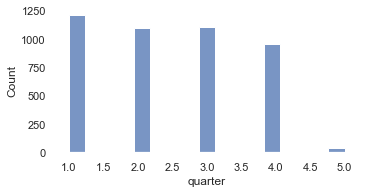

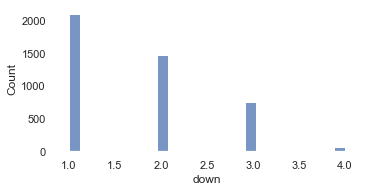

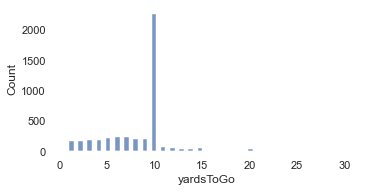

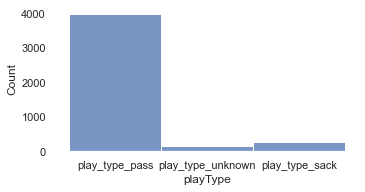

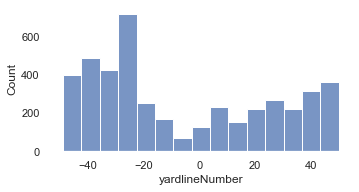

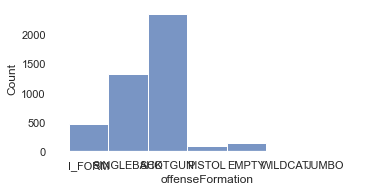

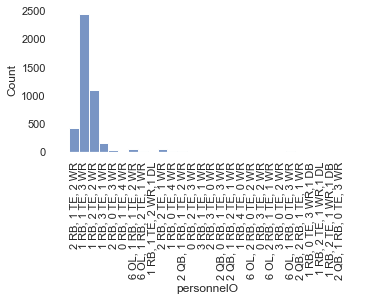

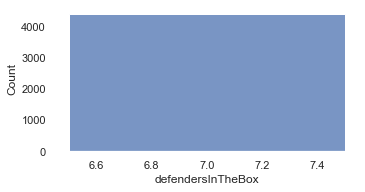

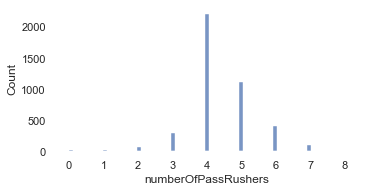

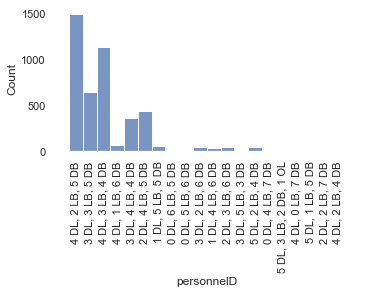

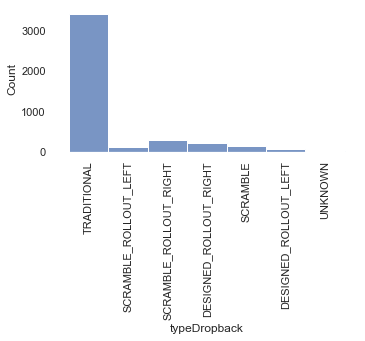

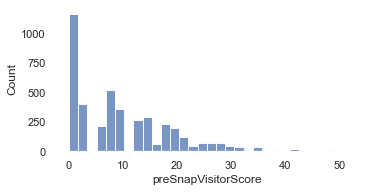

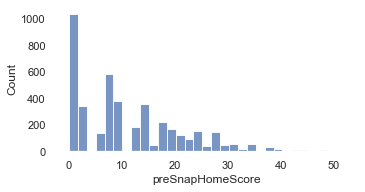

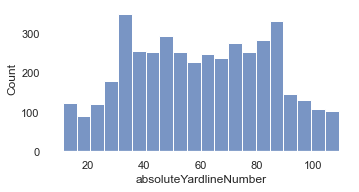

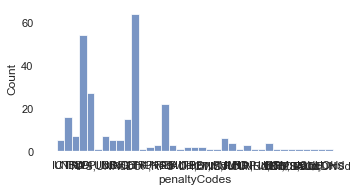

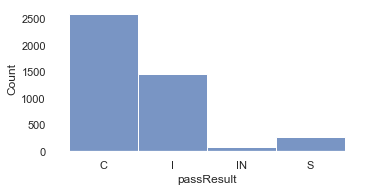

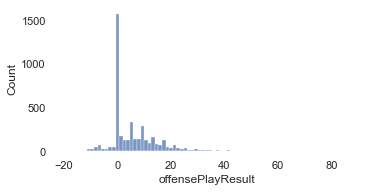

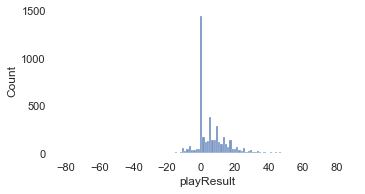

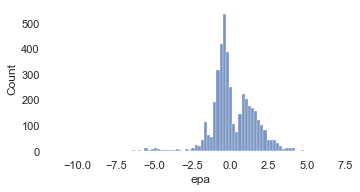

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


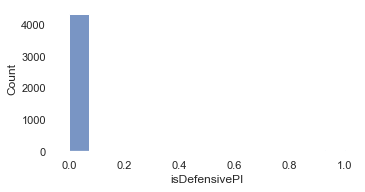

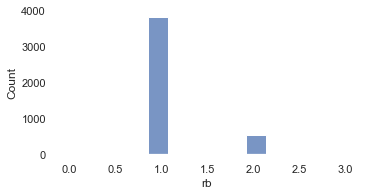

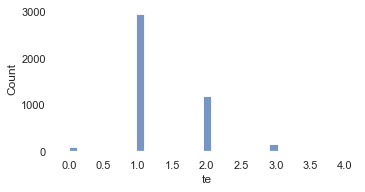

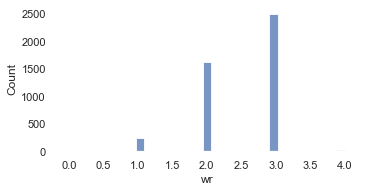

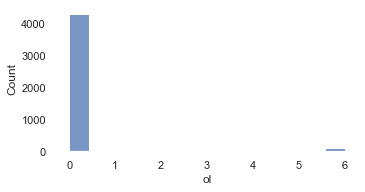

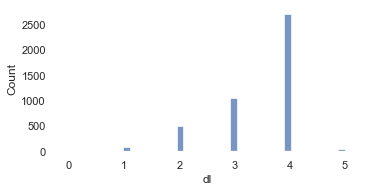

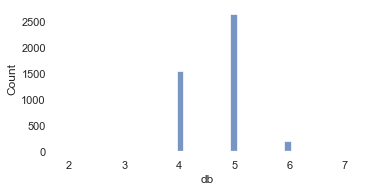

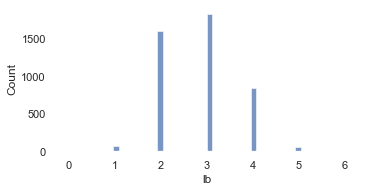

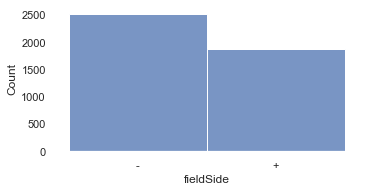

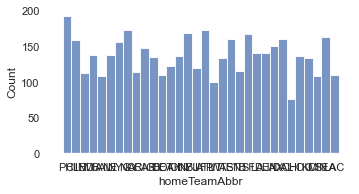

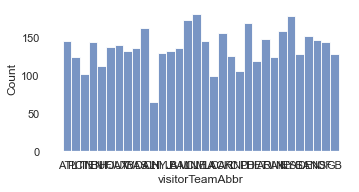

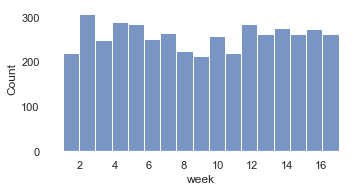

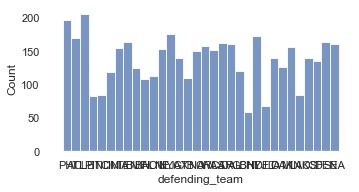

--------------------------------------------------
8.0
           quarter         down    yardsToGo  yardlineNumber  \
count  1059.000000  1059.000000  1059.000000     1059.000000   
mean      2.389046     1.564684     8.009443       -5.096317   
std       1.081601     0.725136     3.402977       30.034671   
min       1.000000     1.000000     1.000000      -49.000000   
25%       1.000000     1.000000     6.000000      -30.000000   
50%       2.000000     1.000000    10.000000      -11.000000   
75%       3.000000     2.000000    10.000000       20.000000   
max       5.000000     4.000000    20.000000       50.000000   

       defendersInTheBox  numberOfPassRushers  preSnapVisitorScore  \
count             1059.0          1017.000000          1017.000000   
mean                 8.0             4.650934             9.398230   
std                  0.0             1.125528             8.929498   
min                  8.0             0.000000             0.000000   
25%               

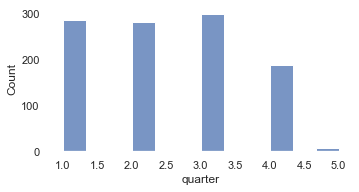

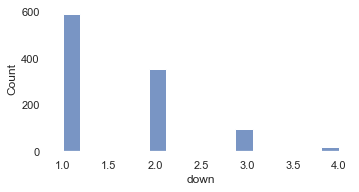

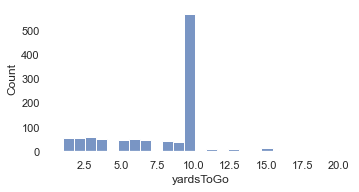

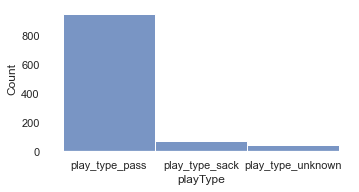

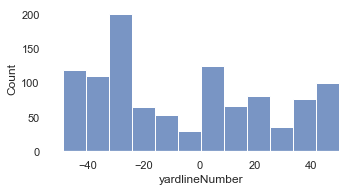

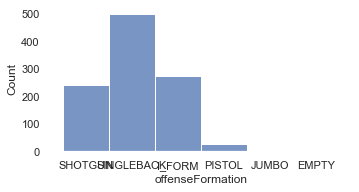

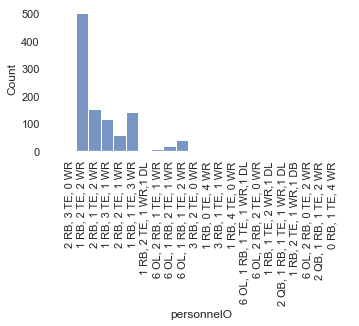

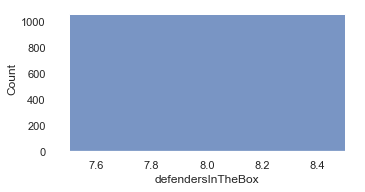

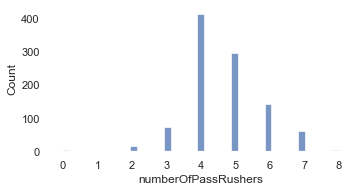

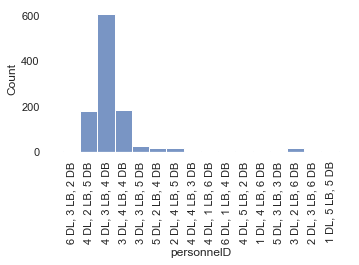

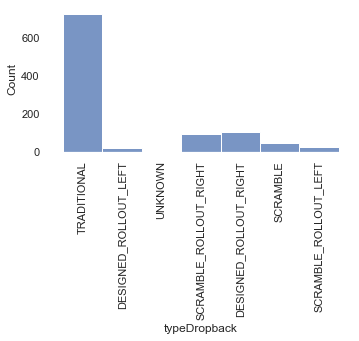

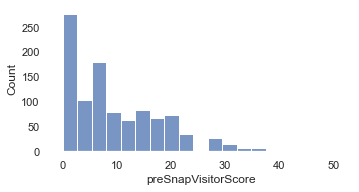

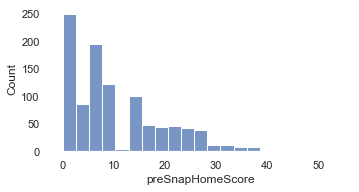

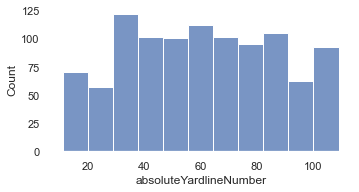

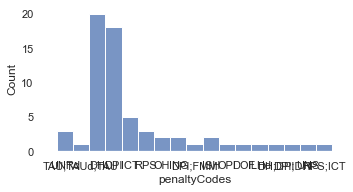

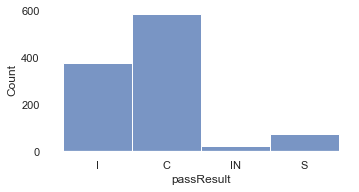

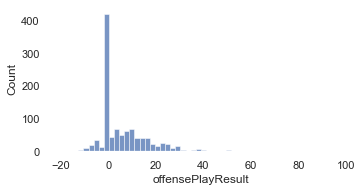

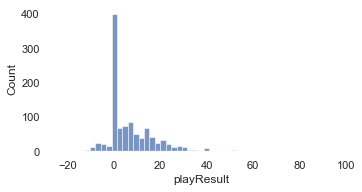

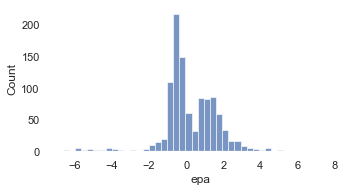

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


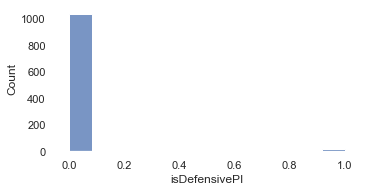

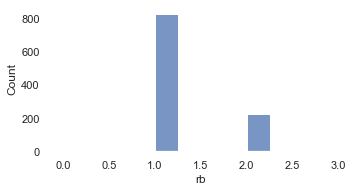

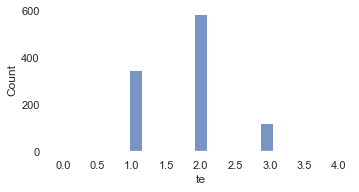

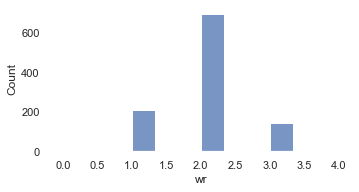

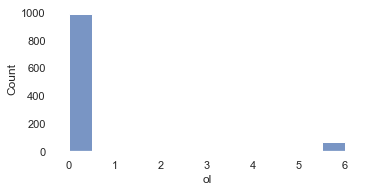

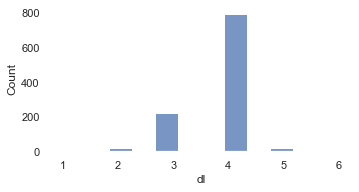

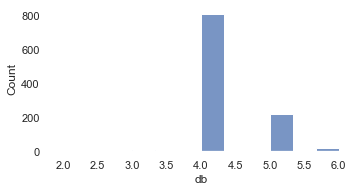

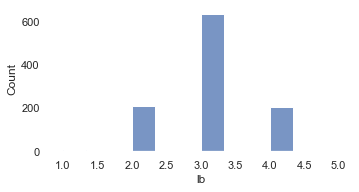

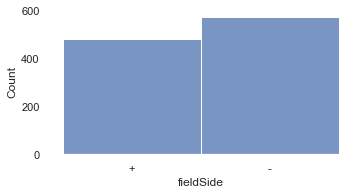

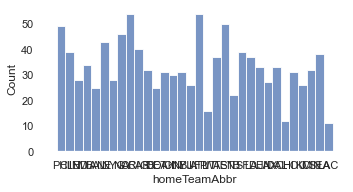

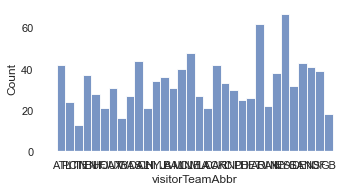

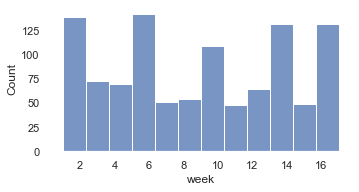

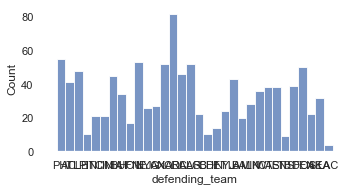

In [18]:
#create histograms of defenders in box by metric
counter=1
for i, group in combo.groupby('defendersInTheBox'): #group by defenders in box
    print('-' * 50)
    print(i)
    print(group.describe())
    counter2 = 1
    for c in group.columns: #loop through groups
        if c in ['playDescription', 'possessionTeam', 'yardlineSide', 'gameclock']: #filter
            continue
        else:
            #plot histplot
            plt.figure(counter, figsize=(25,25))
            plt.subplot(8,4,counter2)
            sns.histplot(group[c])
            counter2 += 1
            if c in ['personnelD', 'typeDropback', 'personnelO']: #apply x rotation
                plt.xticks(rotation='90')
            else:
                pass
        plt.show()
    
#     group.plot.hist(subplots=True, legend=False, layout=(8,5))
    #plt.show()
    counter += 1
    


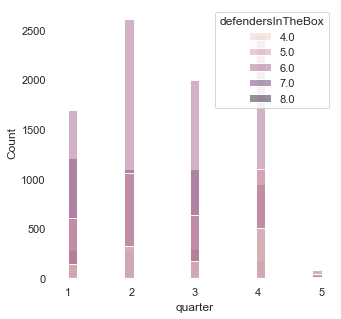

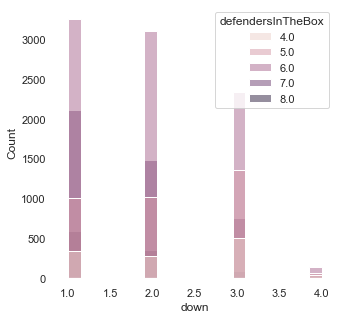

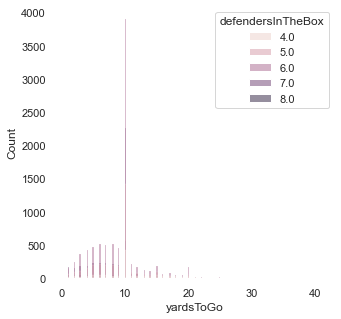

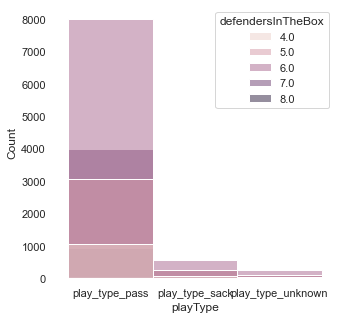

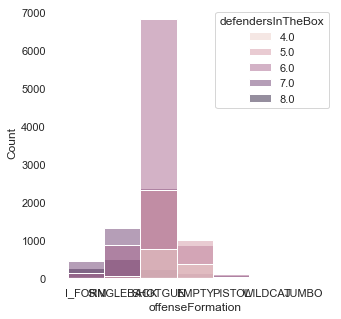

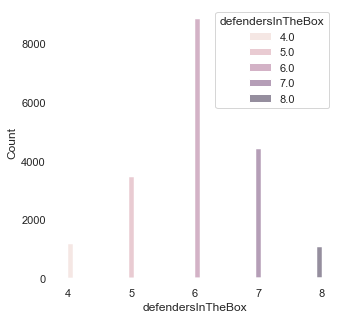

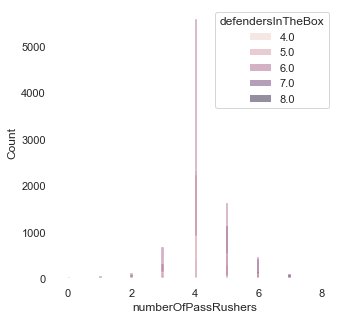

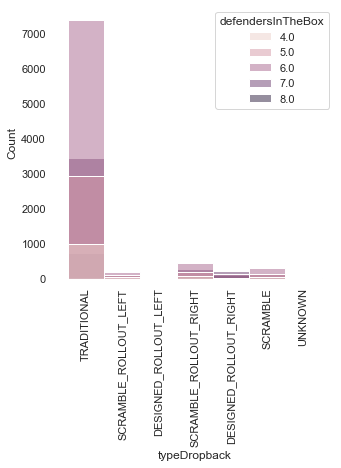

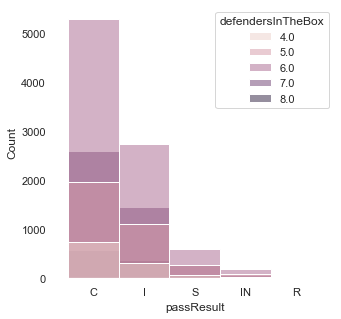

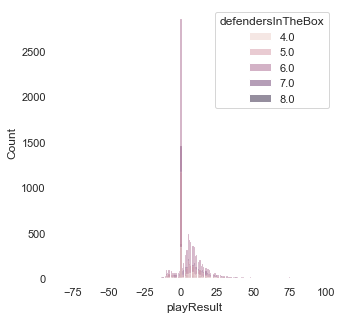

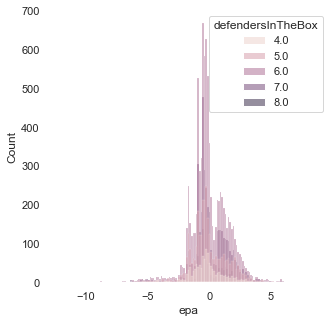

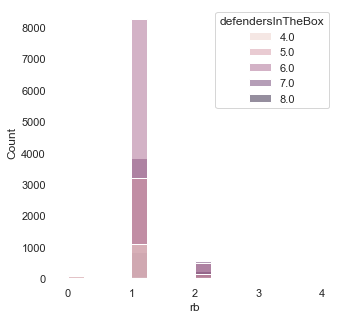

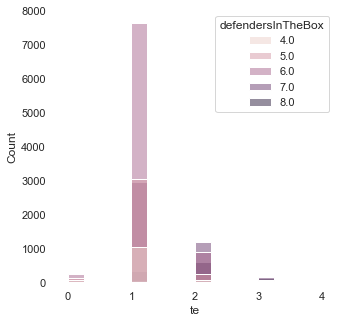

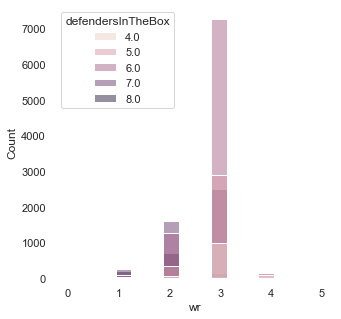

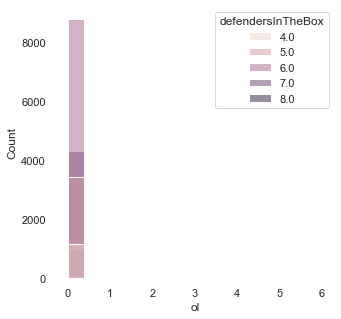

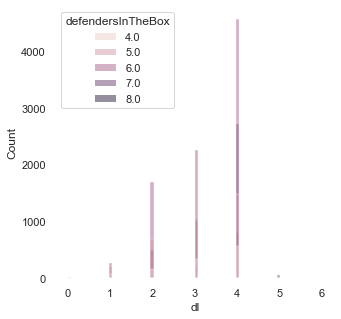

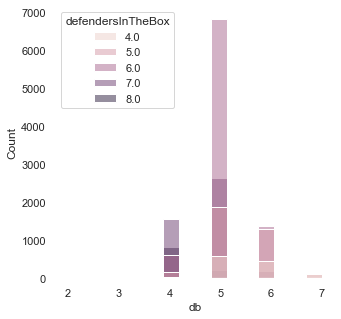

In [19]:
#alternative histograms
counter=1
for n in combo.columns:
    if n in colnames:
        plt.figure(counter, figsize=(5,5))
        sns.histplot(data=combo, x=n, hue = 'defendersInTheBox')
        if n in ['personnelD', 'typeDropback', 'personnelO']:
            plt.xticks(rotation='90')
        else:
            pass
        plt.show()
    counter+=1

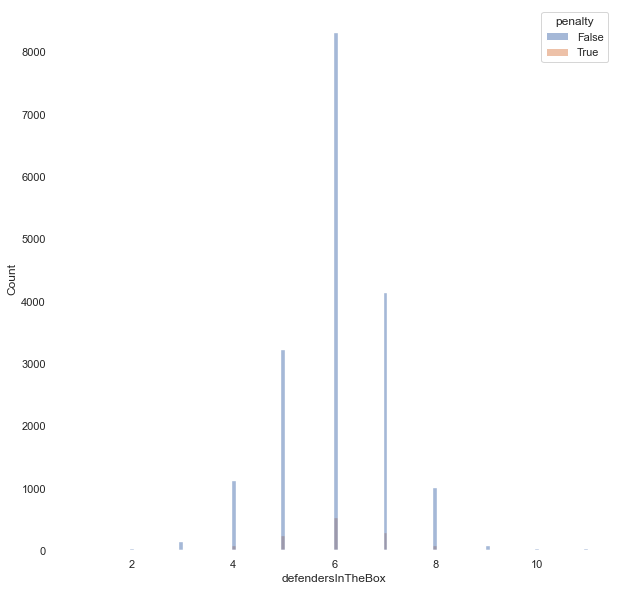

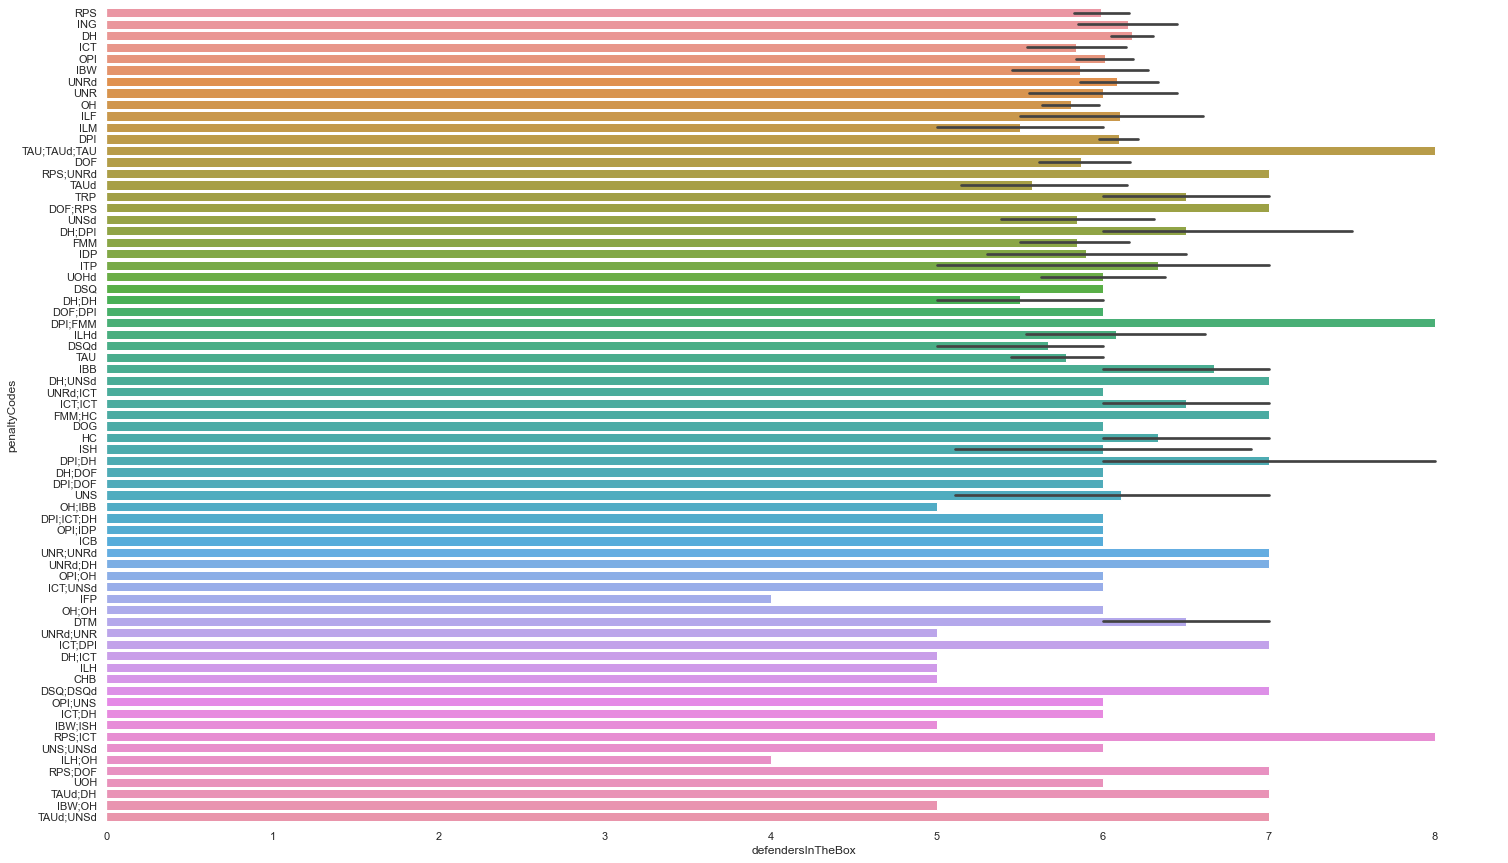

In [20]:
#defenders in box vs penalties
import math
plays_df['penalty'] = [True if str(x) != 'nan' else False for x in plays_df.penaltyCodes] #create penalty column
plays_df[plays_df.penalty == True]
plays_df.shape
#plays_df.penaltyCodes.iloc[0]
plt.figure(figsize=(10,10))
sns.histplot(plays_df, x='defendersInTheBox', hue='penalty') #create histogram
#
plt.figure(figsize=(25, 15))
sns.barplot(data = combo, x='defendersInTheBox', y='penaltyCodes')#, hue='defendersInTheBox') #plot hist by penalty
plt.show()

No significant effect seen in the # of penalties vs # of defenders in box. Follows same distribution as # of plays vs defenders in box.



# Defenders in Box By Defensive Team and Offensive Team

/Users/dimitriospsaltos/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


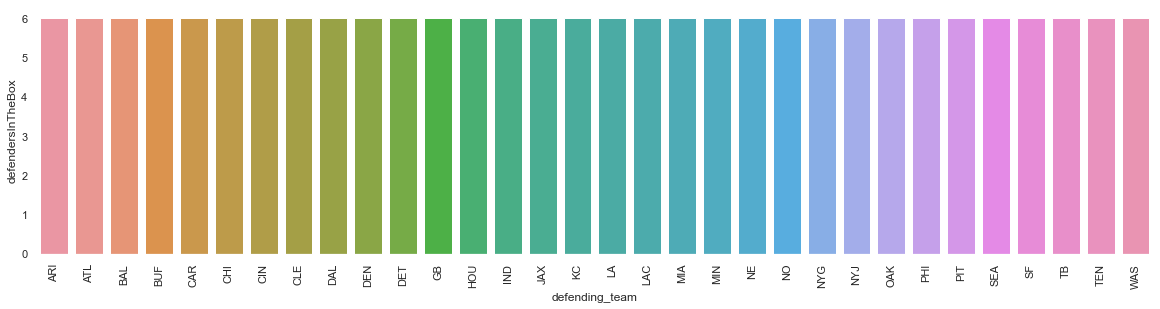

/Users/dimitriospsaltos/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


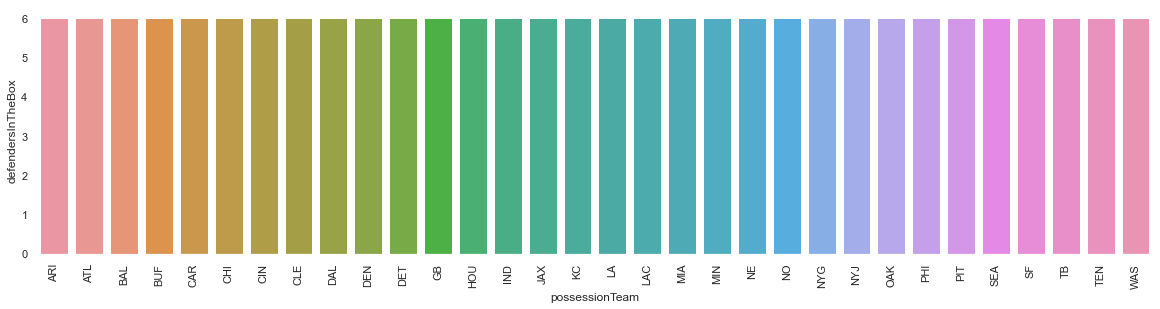

In [21]:
#Def in box vs def team!
plt.figure(figsize=(20,10))
plt.subplot(211)
#combo.head()
combo.groupby('defending_team').describe()['defendersInTheBox']
#sns.heatmap(combo.groupby('defending_team').median('defendersInTheBox'), annot=True, linewidths=0.5)
teams = combo.groupby('defending_team').median()['defendersInTheBox']
teams = teams.reset_index()
sns.barplot(teams.iloc[:,0], teams['defendersInTheBox'])
plt.xticks(rotation='90')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(212)
#Def in box vs def team!
combo.head()
combo.groupby('possessionTeam').describe()['defendersInTheBox']
#sns.heatmap(combo.groupby('defending_team').median('defendersInTheBox'), annot=True, linewidths=0.5)
teams = combo.groupby('possessionTeam').median()['defendersInTheBox']
teams = teams.reset_index()
sns.barplot(teams.iloc[:,0], teams['defendersInTheBox'])
plt.xticks(rotation='90')
plt.show()

## Defenders in Box vs Def Team

No change in defenders in box by team

## Defenders in Box vs Off Team
No change in defenders in box by team


# Defenders in Box, Grouped By Defensive Team, vs Metric

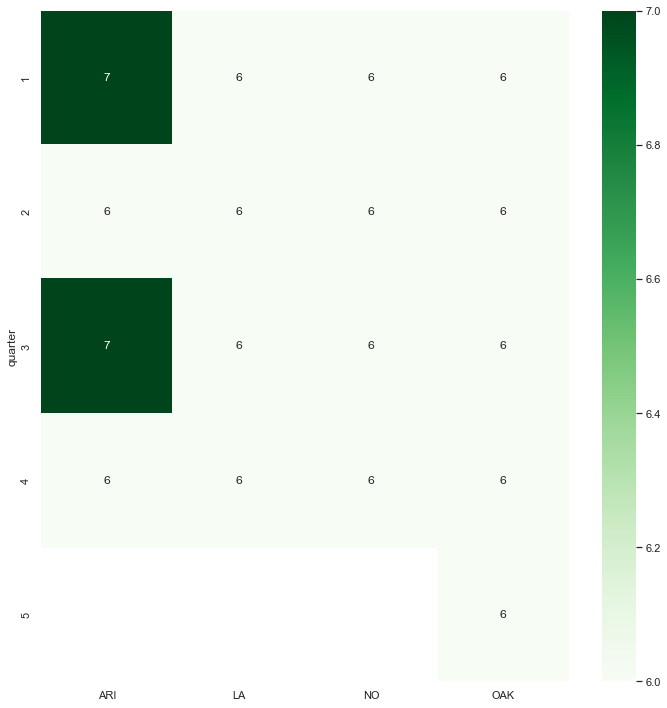

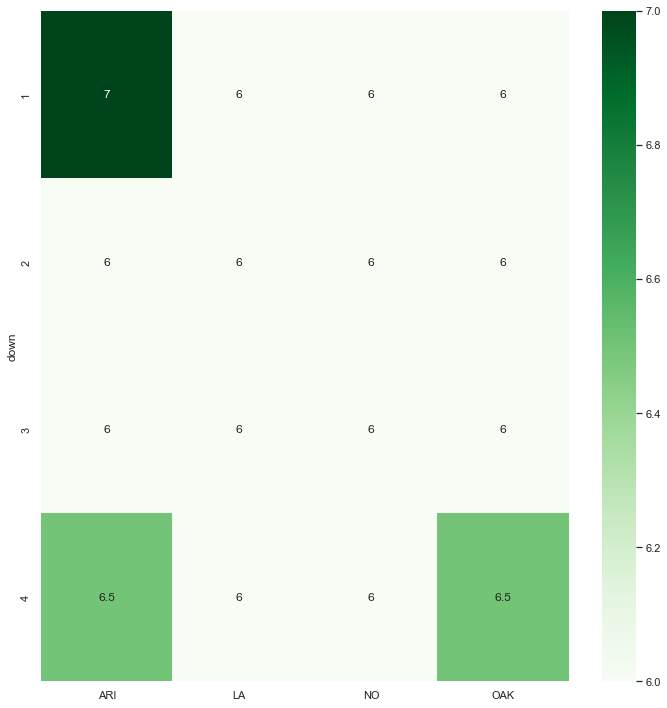

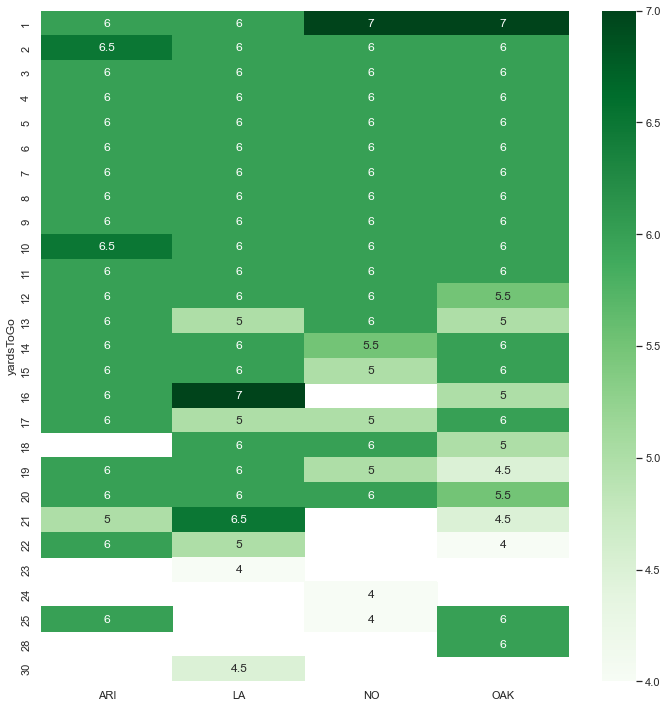

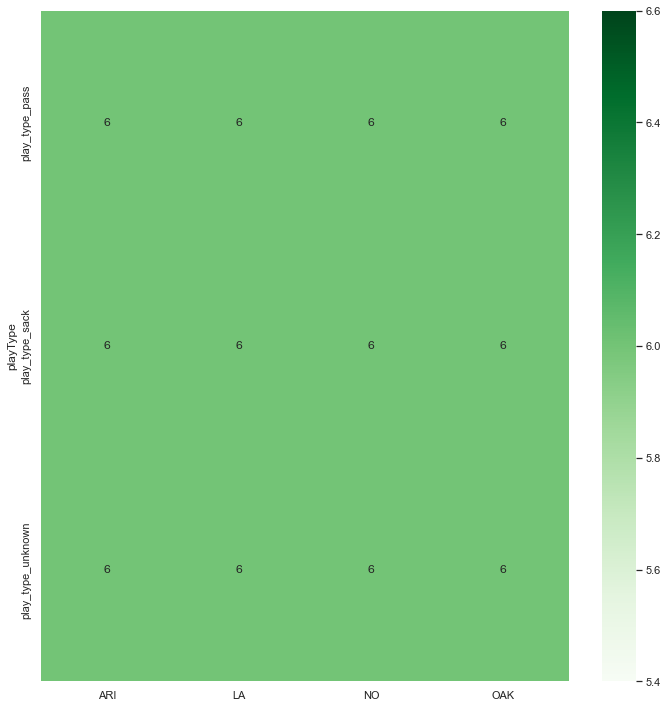

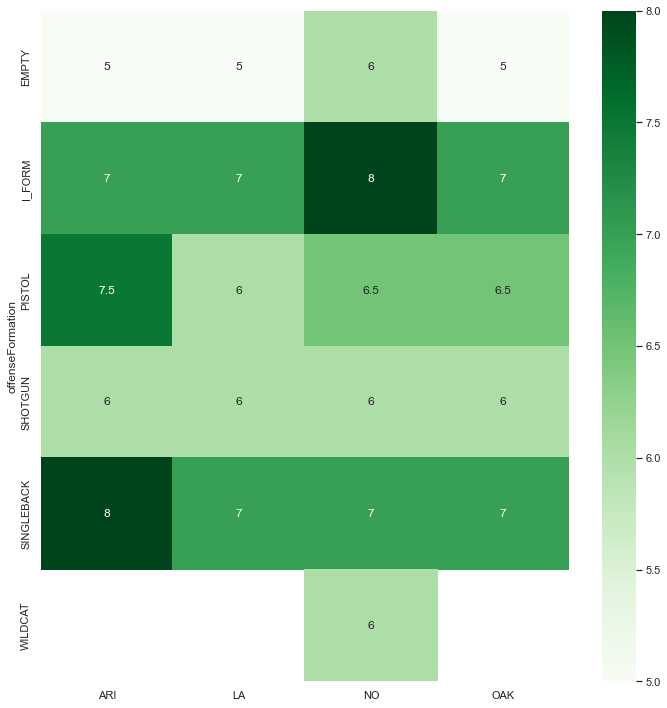

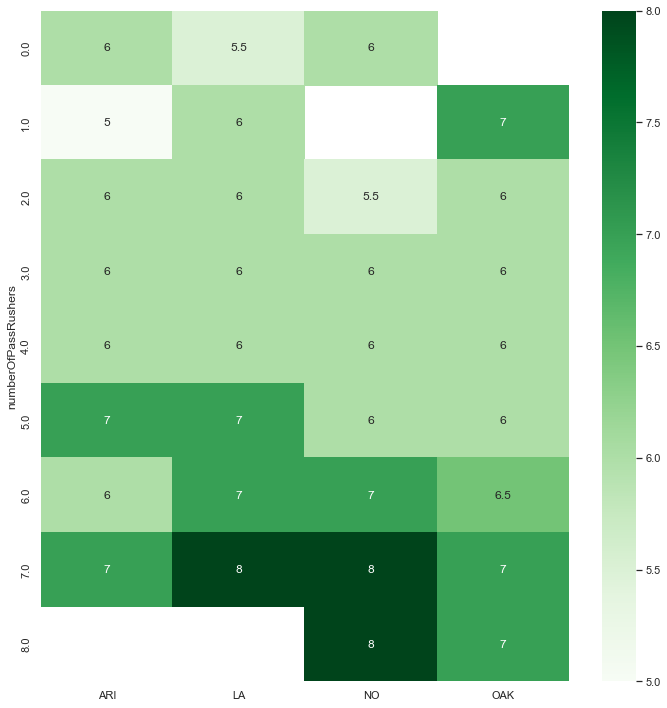

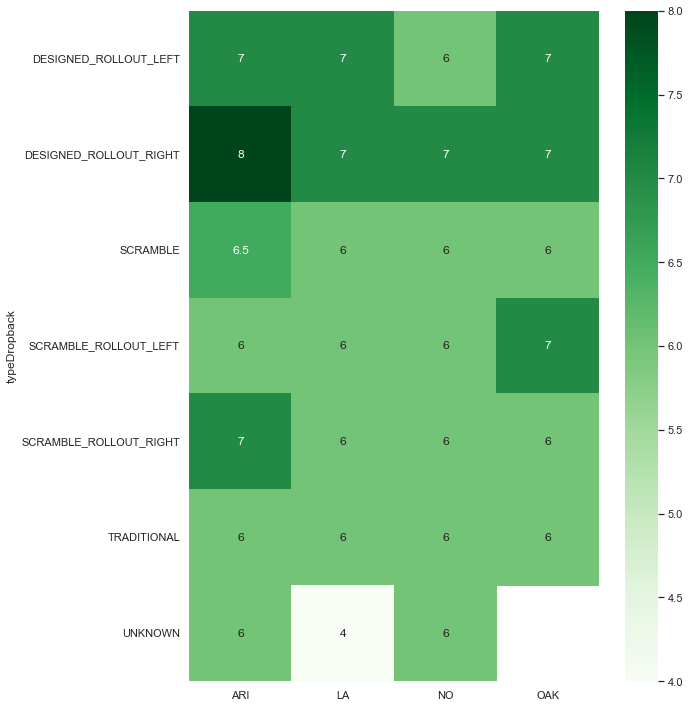

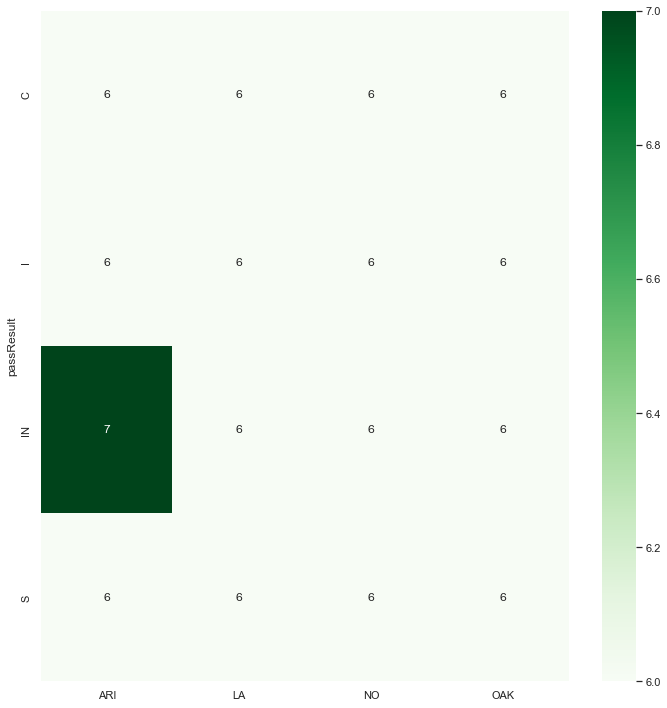

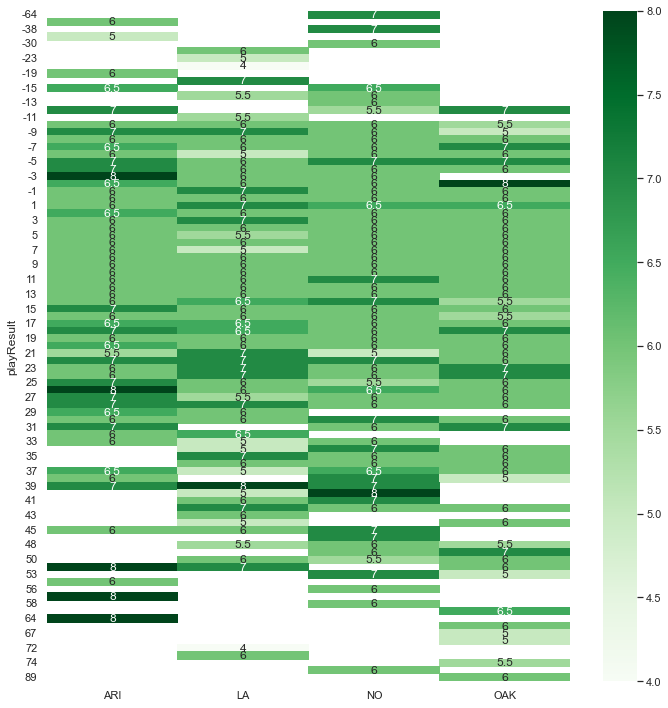

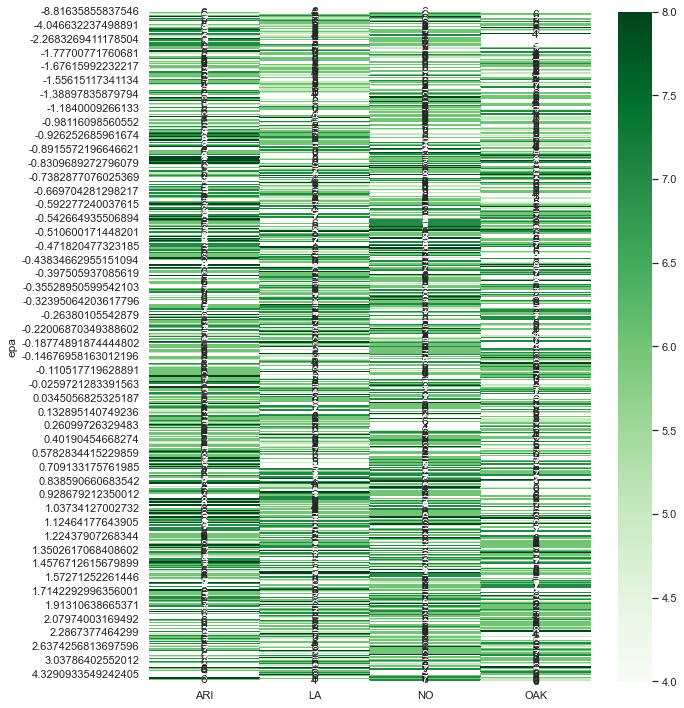

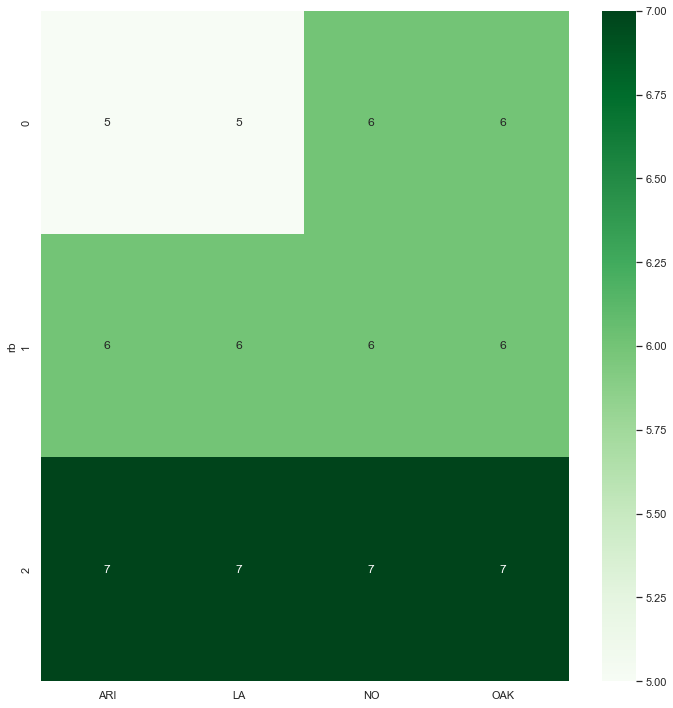

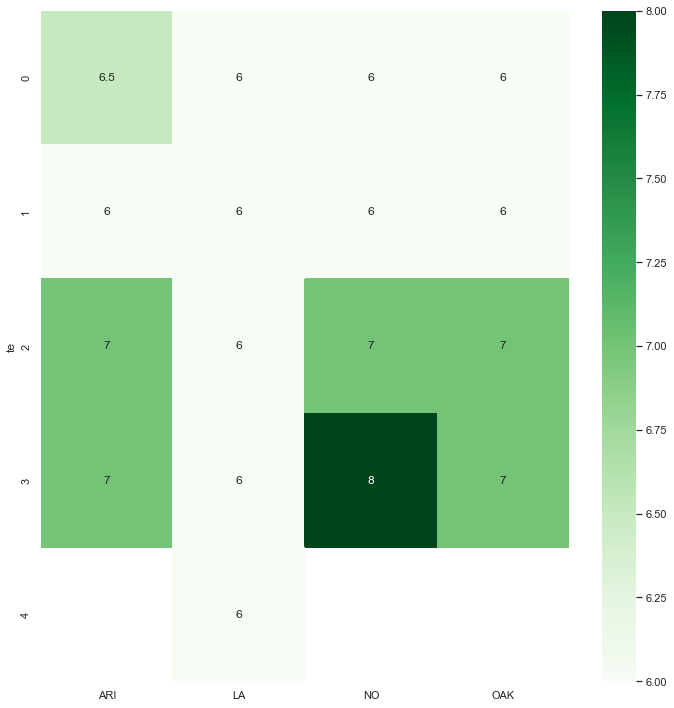

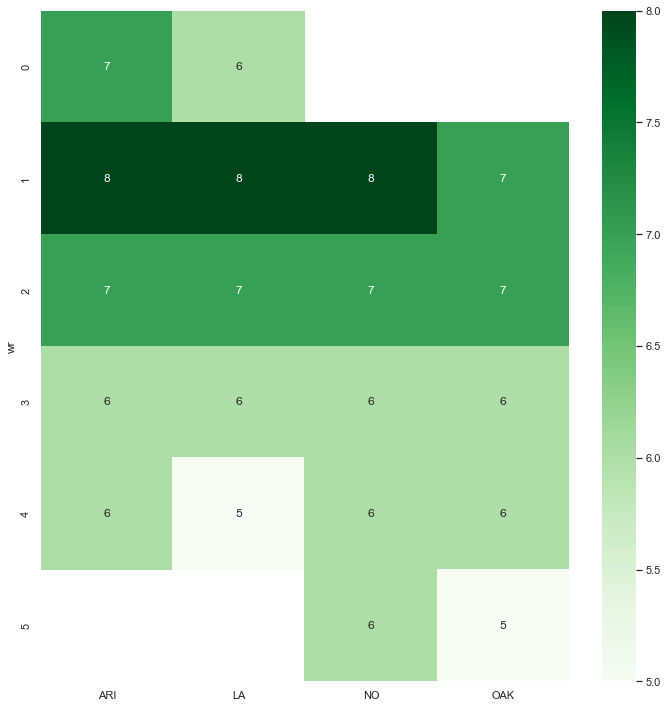

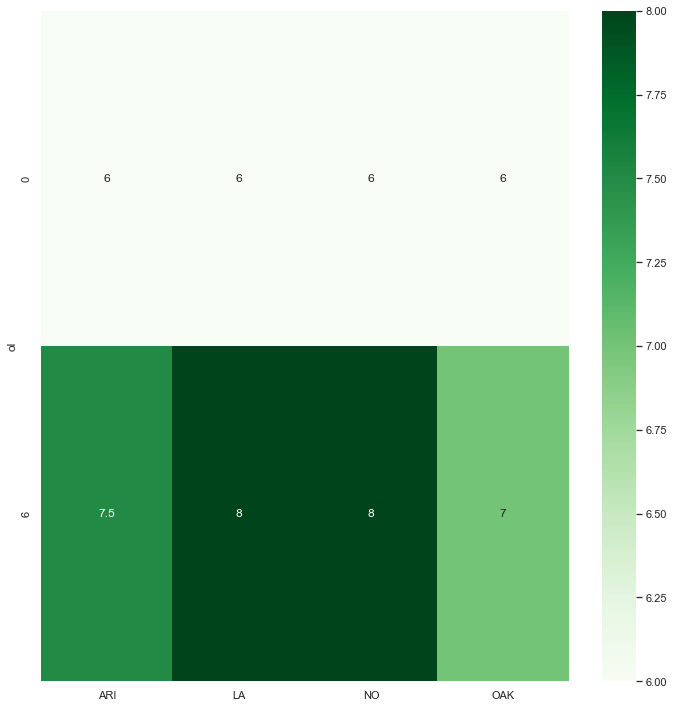

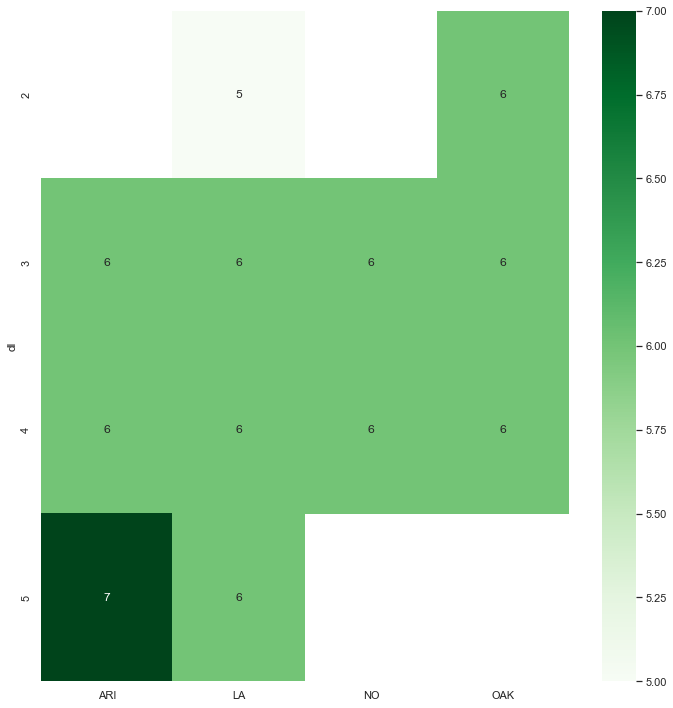

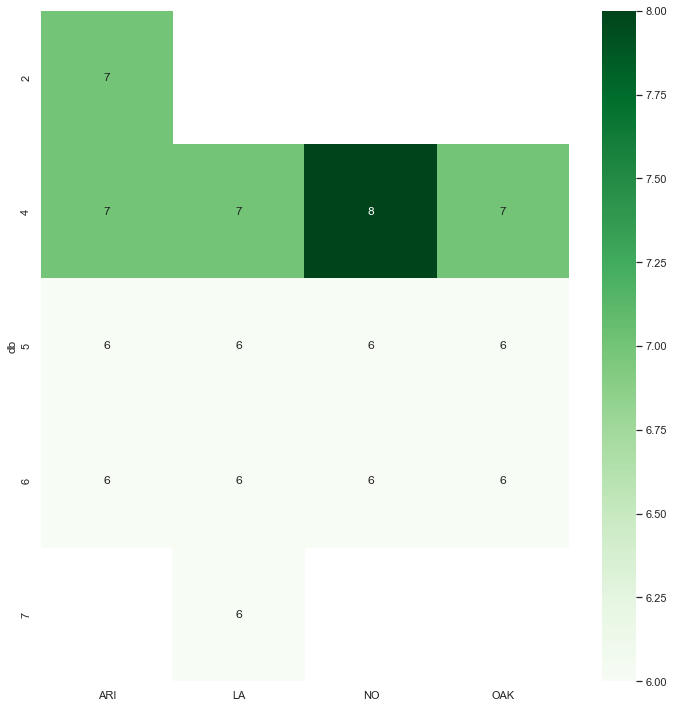

In [22]:
counter = 1
#filter for top two best teams and worst two teams
sub_combo = combo[(combo['defending_team'] == 'ARI') | (combo['defending_team'] == 'NO') #get medians of defenders in box
                  | (combo['defending_team'] == 'OAK') |
                  (combo['defending_team'] == 'LA')]
for c in sub_combo.columns: #loop through columns
    if c in colnames: #see if column is in desired list 
        try:
            plt.figure(counter, figsize=(10,10))
            team_df = sub_combo.groupby(['defending_team', c]).median()['defendersInTheBox'] #get medians of defenders in box
            sub_team = team_df.reset_index()
            sub_team = sub_team.pivot(c, 'defending_team')
            sub_team.columns = ['ARI', 'LA', 'NO', 'OAK'] #set columns
            #plot heatmap
            sns.heatmap(sub_team, annot=True, cmap='Greens')
            plt.tight_layout()
            plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/heatmatp_defTeam_{}.png'.format(c))
            
            counter += 1
        except:
            continue
    else:
        continue

# Defenders in Box, Grouped By Offensive Team, vs Metric

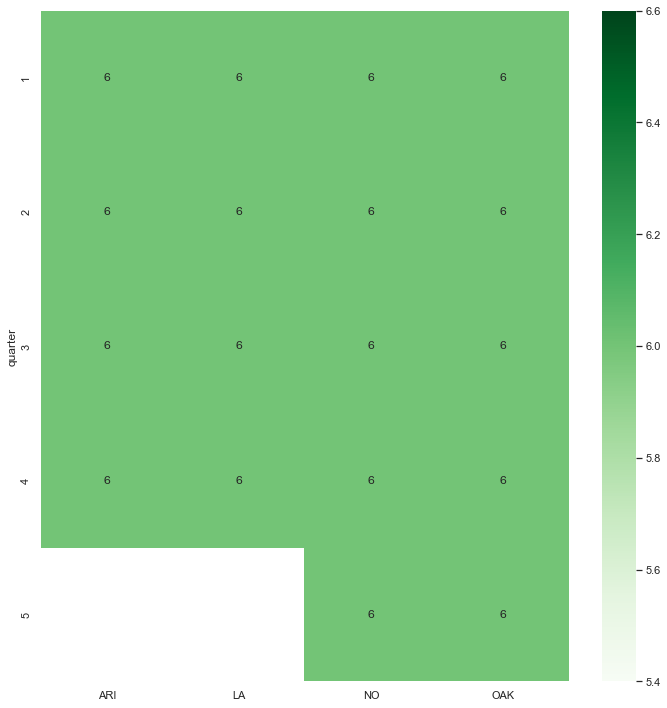

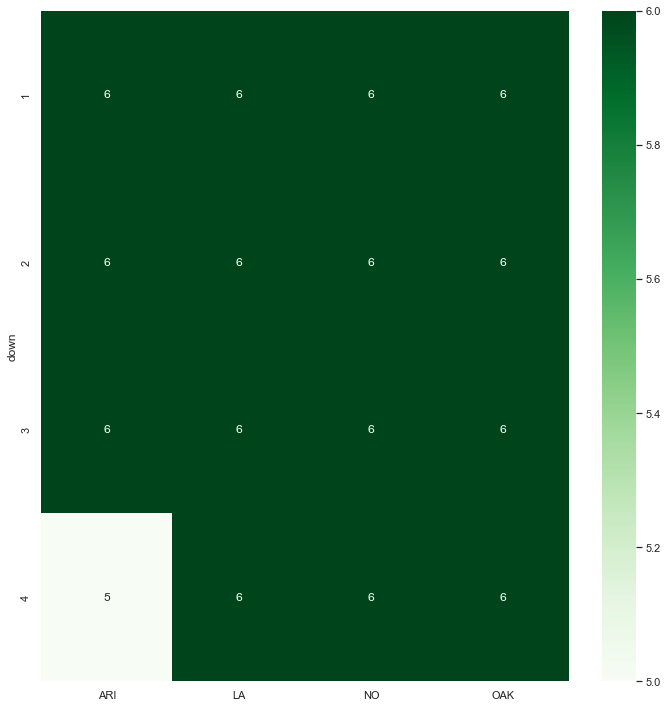

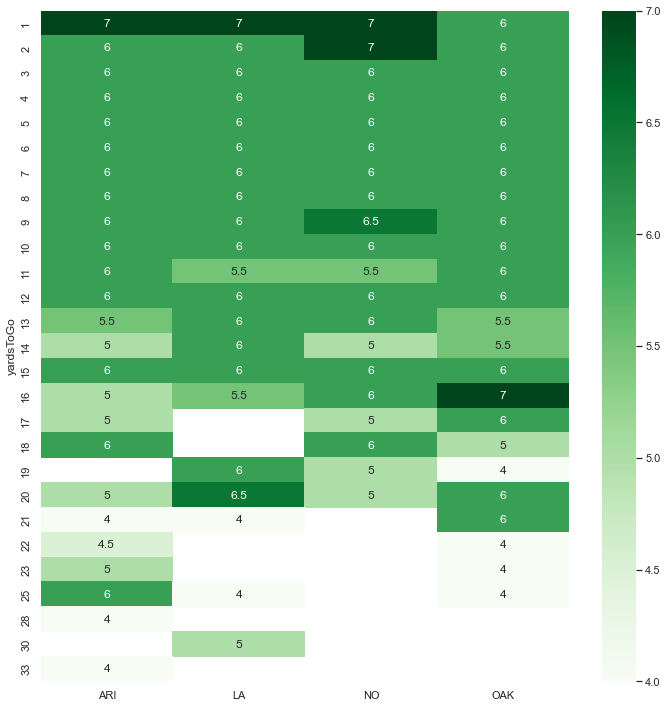

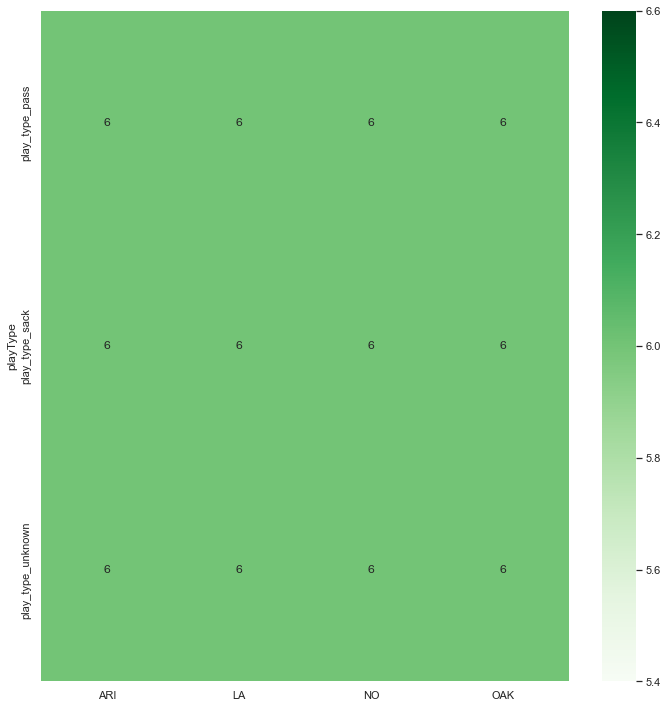

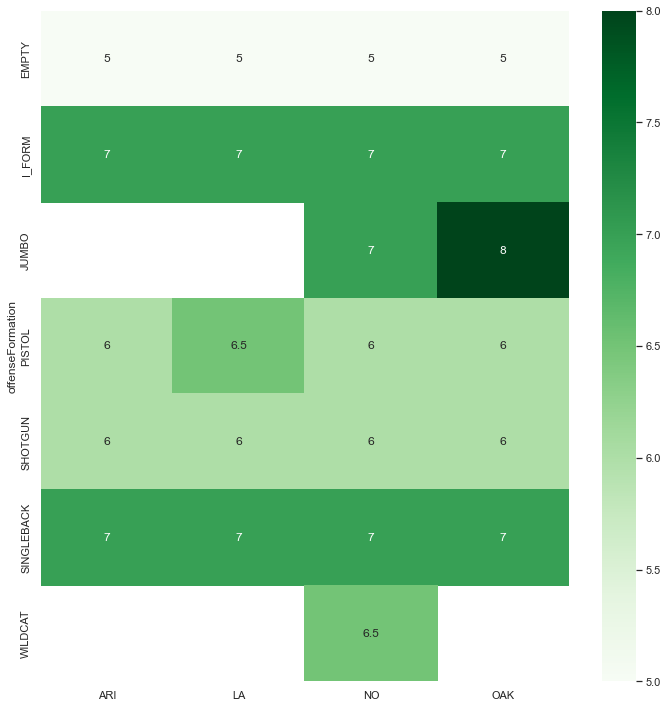

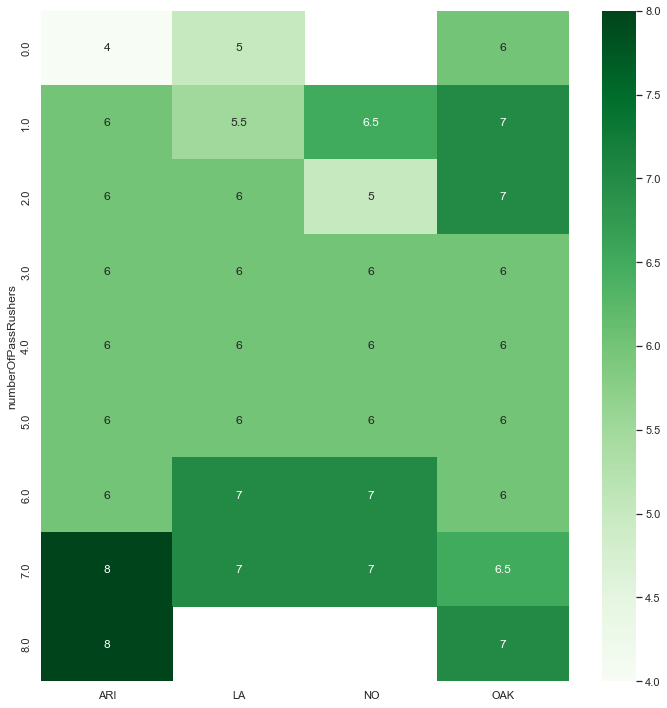

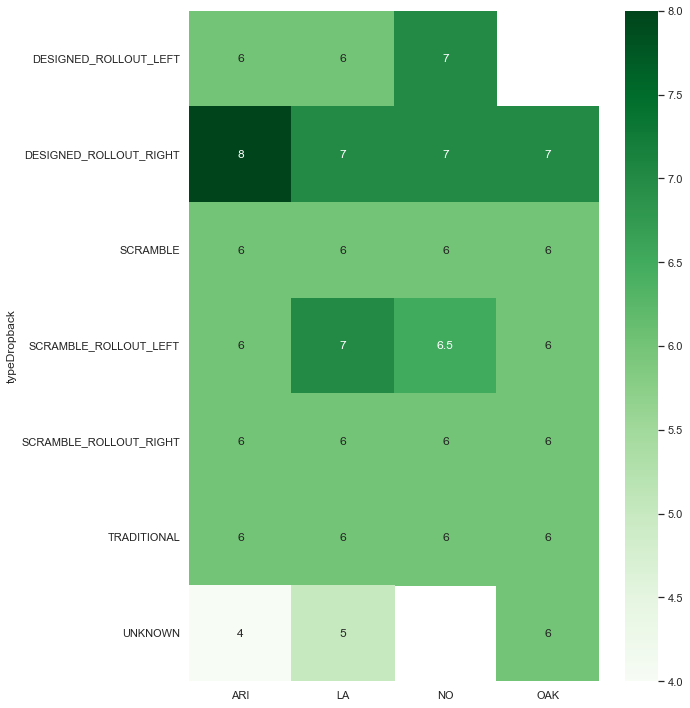

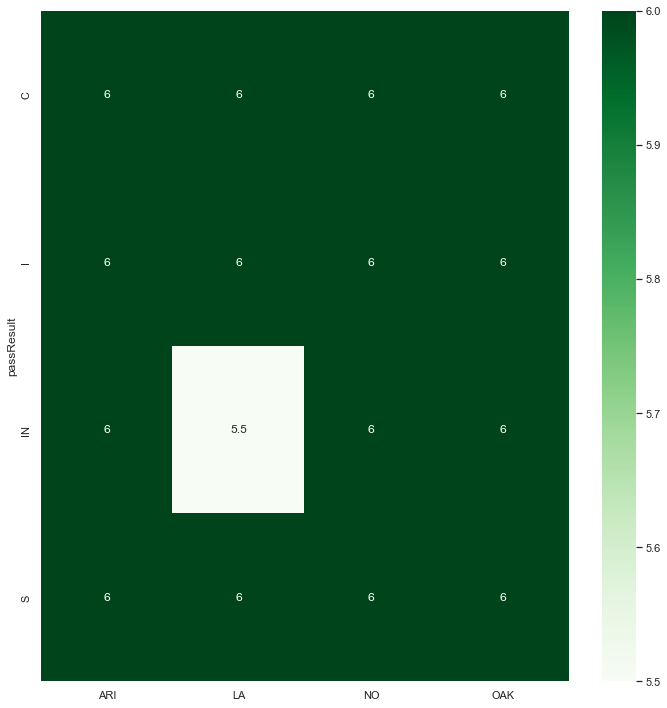

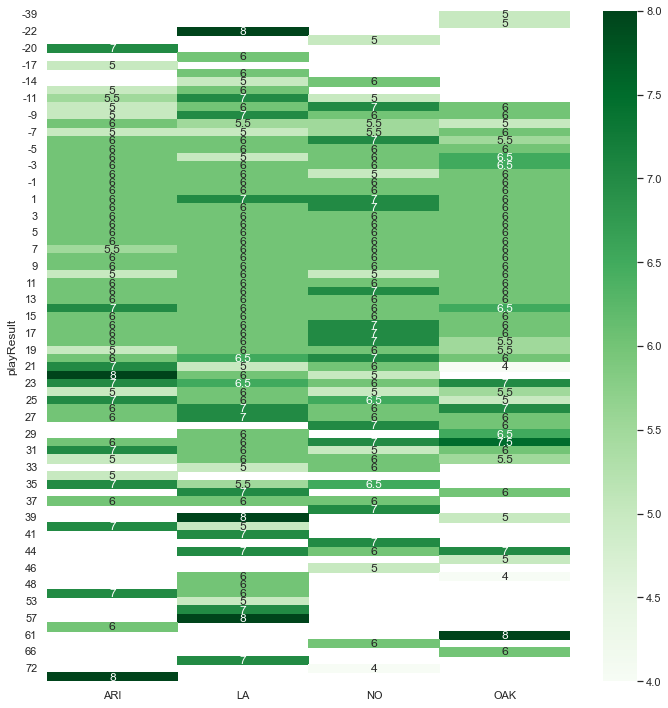

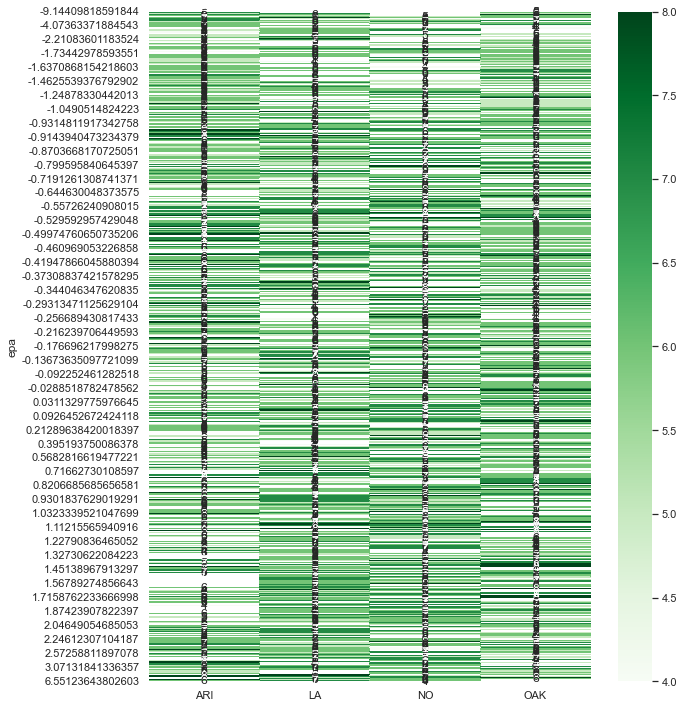

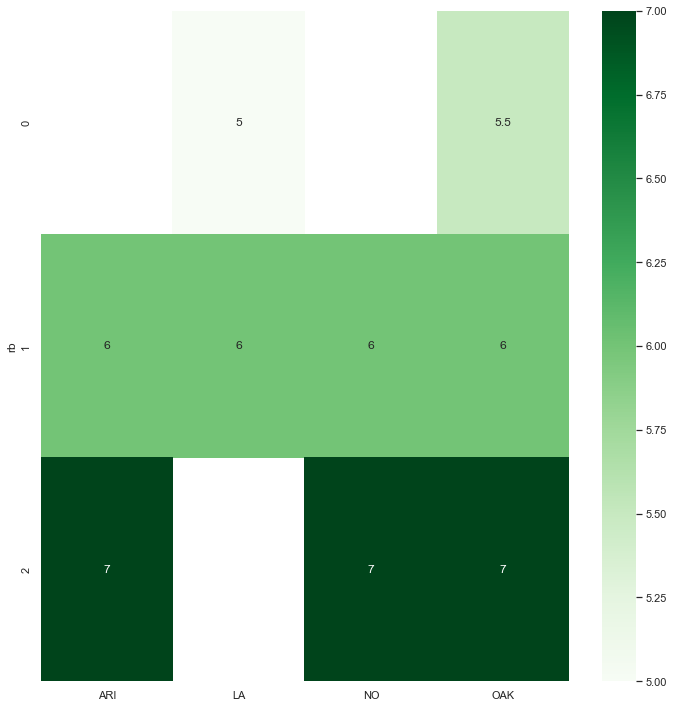

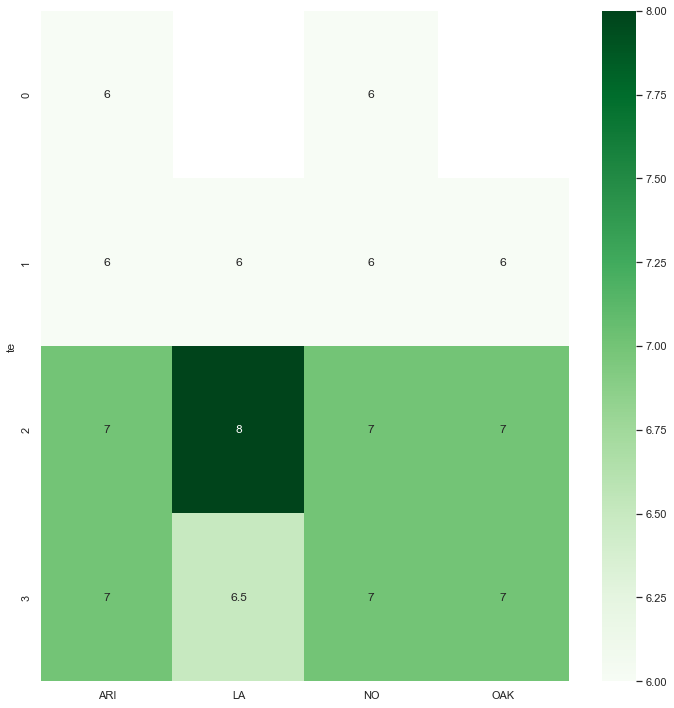

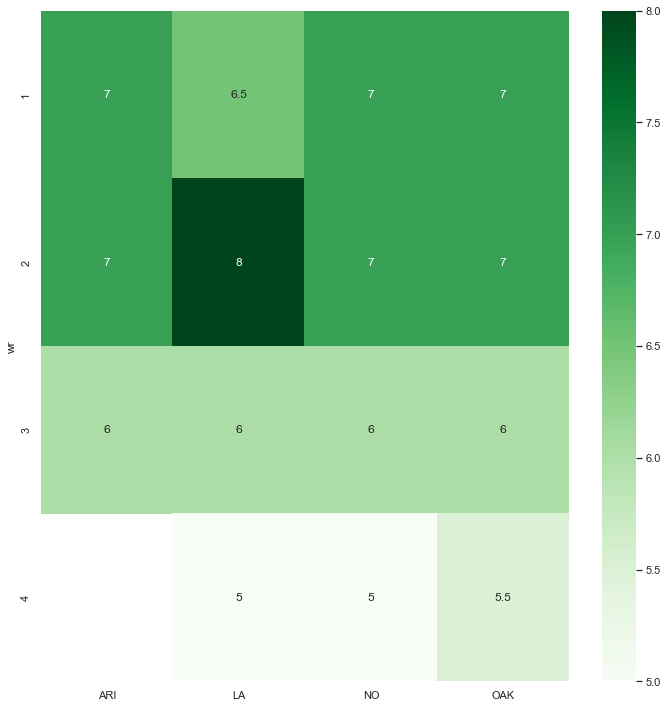

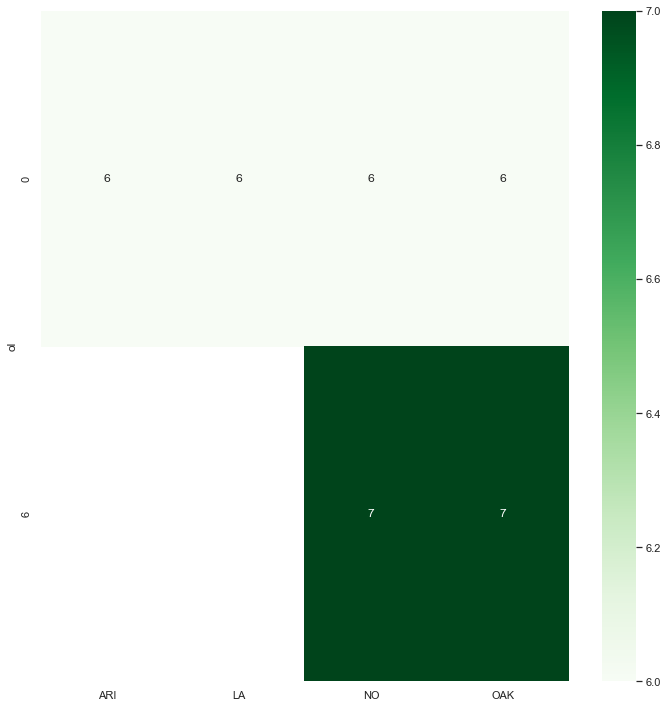

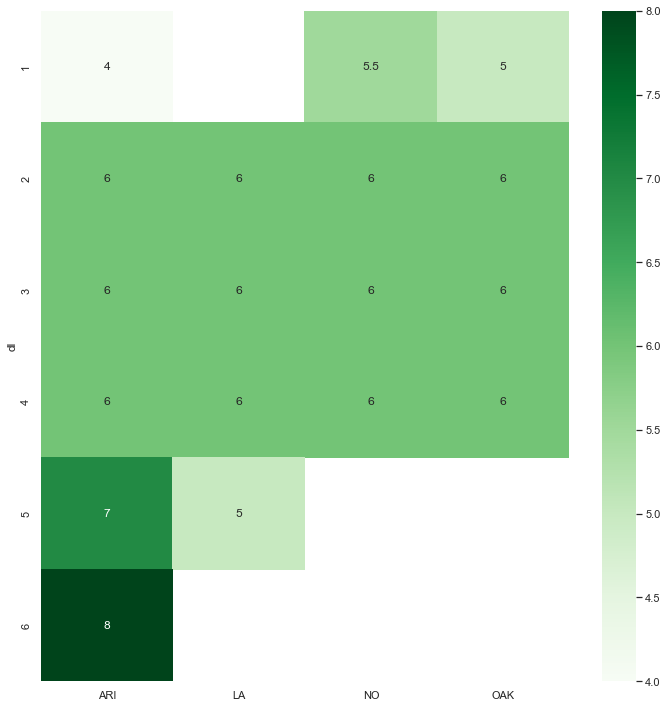

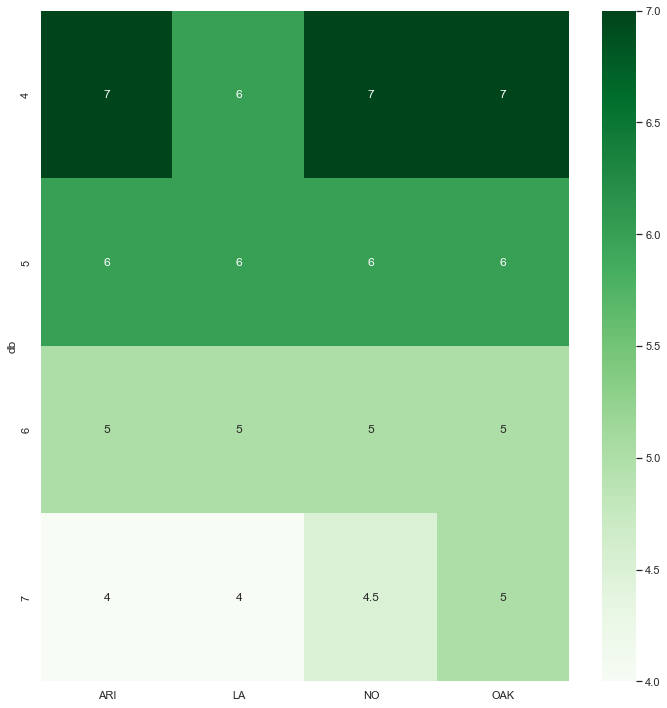

In [23]:
#plt.figure(figsize=(20,15))
team_df = combo.groupby(['possessionTeam', c]).median()['defendersInTheBox'] #get median # defenders in box
sub_team = team_df.reset_index()
sub_team = sub_team.pivot(c, 'possessionTeam')
#sns.heatmap(sub_team, annot=True)

counter = 1
#filter for top two best teams and worst two teams
sub_combo = combo[(combo['possessionTeam'] == 'ARI') | (combo['possessionTeam'] == 'NO')
                  | (combo['possessionTeam'] == 'OAK') |
                  (combo['possessionTeam'] == 'LA')]
for c in sub_combo.columns: #loop through columns
    if c in colnames: #see if column is in desired list 
        try:
            plt.figure(counter, figsize=(10,10))
            team_df = sub_combo.groupby(['possessionTeam', c]).median()['defendersInTheBox'] #get median # of def in box
            sub_team = team_df.reset_index()
            sub_team = sub_team.pivot(c, 'possessionTeam')
            sub_team.columns = ['ARI', 'LA', 'NO', 'OAK'] #set colnames
            #plot heatmap
            sns.heatmap(sub_team, annot=True, cmap='Greens')
            plt.tight_layout()
            plt.savefig('/Users/dimitriospsaltos/Desktop/Berkeley/python_course/project2/heatmatp_offTeam_{}.png'.format(c))
            counter += 1     
        except:
                continue
    else:
        continue